# CREDIT CARD FRAUD DETECTION

## *GROUP Q*

| **NAME**                | **STUDENT_ID**   | **CONTRIBUTION**  |
|------------------------|-----------------|------------------|
|**Neetu Kumari**       | **0265402**     | **50%**         |
|**Radhika Jayakrishnan**| **0269994**     | **50%**        |


## BUSINESS UNDERSTANDING :

The unlawful use of another person's credit card for purchases or cash advances without the cardholder's consent is known as credit card fraud. While fraudsters may obtain the actual card through theft, they are increasingly using digital techniques to steal the credit card number and related personal information, allowing them to carry out illegal activities. Through this group project, our goal is to create a predictive model that can use the given information to identify which credit card transactions are legitimate and which are fraudulent. In order to protect financial institutions and cardholders from potential fraudulent actions, this model will be essential in improving the security and accuracy of transaction processing.

## DATA UNDERSTANDING: 

The dataset has been taken from [kaggle website](https://www.kaggle.com/datasets/kartik2112/fraud-detection) in the form of two files "fraudTest.csv" and "fraudTrain.csv". 
This is the simulated credit card dataset information, containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. 
We have in total 1852394rows × 22columns after combining both the datasets.

## OBJECTIVE

To predict if a given credit card transaction is a legitimate or fraud transaction based on data collected from 1000 merchants

## 1. Importing Libraries

In [1]:
#Import Python libraries
import pandas as pd
import numpy as np
import os
import math
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

## 2. IMPORTING DATASETS AND COMBINING

In [2]:
#Importing the fraudTest.csv file
fraud_test = pd.read_csv(r"C:\Users\radhi\CBU_Predictive\Credit card fraud detection\fraudTest.csv")

In [3]:
#Importing the fraudTrain.csv file
fraud_train = pd.read_csv(r"C:\Users\radhi\CBU_Predictive\Credit card fraud detection\fraudTrain.csv")

### 2.1 Checking Columns for the both datasets

In [4]:
#Finding columns in both the datasets
fraud_test.head(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [5]:
fraud_train.head(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

<font color=blue>**Interpretation**:</font>\
Both datasets have same columns with same names

### 2.2 Datatypes of attributes in both datasets

In [6]:
#Finding datatypes of all the attributes in both datasets
fraud_test.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
fraud_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

<font color=blue>**Interpretation**:</font>\
Both datasets have same datatypes for each columns. So, now we can combine both the datasets.

### 2.3 Combining both the datasets

In [8]:
#Combining both the datasets columnwise
fraud_data = pd.concat([fraud_train,fraud_test])
fraud_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street  ...      lat      long  \
0         Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1          Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2       Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3         White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4        Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
...         ...    ...                           ...  ...      ...       ...   
555714    Olson      M           558 Michael Estates  ...  40.4931  -91.8912   
555715  Vasquez      M           572 Davis Mountains  ...  29.0393  -95.4401   
555716   Lawson      F    144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717  Preston      M    7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718     Frey      M      830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                                job         dob  \
0           3495          Psychologist, counselling  1988-03-09   
1            149  Special educational needs teacher  1978-06-21   
2           4154        Nature conservation officer  1962-01-19   
3           1939                    Patent attorney  1967-01-12   
4             99     Dance movement psychotherapist  1986-03-28   
...          ...                                ...         ...   
555714       519                       Town planner  1966-02-13   
555715     28739                     Futures trader  1999-12-27   
555716      3684                           Musician  1981-11-29   
555717       129                       Cartographer  1965-12-15   
555718    116001                        Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         .

<font color=blue>**Interpretation**:</font>\
After combining both the datasets, total number of rows are 1852394 and 23 columns, hence we need to reset the index.

### 2.4 Shape of new dataset

In [9]:
fraud_data.shape

(1852394, 23)

### 2.5 Datatypes present in the dataset

In [10]:
fraud_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

<font color=blue>**Interpretation**:</font>\
Out of 22 attributes 12 attributes are object (i.e. nominal or ordinal data) and 10 attributes are numerical.

## 3. DATA UNDERSTANDING AND CLEANING

In [11]:
#Reseting the index
fraud_data = fraud_data.reset_index()
fraud_data

index  Unnamed: 0 trans_date_trans_time            cc_num  \
0             0           0   2019-01-01 00:00:18  2703186189652095   
1             1           1   2019-01-01 00:00:44      630423337322   
2             2           2   2019-01-01 00:00:51    38859492057661   
3             3           3   2019-01-01 00:01:16  3534093764340240   
4             4           4   2019-01-01 00:03:06   375534208663984   
...         ...         ...                   ...               ...   
1852389  555714      555714   2020-12-31 23:59:07    30560609640617   
1852390  555715      555715   2020-12-31 23:59:09  3556613125071656   
1852391  555716      555716   2020-12-31 23:59:15  6011724471098086   
1852392  555717      555717   2020-12-31 23:59:24     4079773899158   
1852393  555718      555718   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   entertainment  220.11   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00   
4                       fraud_Keeling-Crist        misc_pos   41.96   
...                                     ...             ...     ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84   
1852391                     fraud_Rau-Robel       kids_pets   86.88   
1852392               fraud_Breitenberg LLC          travel    7.99   
1852393                   fraud_Dare-Marvin   entertainment   38.13   

             first     last gender  ...      lat      long city_pop  \
0         Jennifer    Banks      F  ...  36.0788  -81.1781     3495   
1        Stephanie     Gill      F  ...  48.8878 -118.2105      149   
2           Edward  Sanchez      M  ...  42.1808 -112.2620     4154   
3           Jeremy    White      M  ...  46.2306 -112.1138     1939   
4            Tyler   Garcia      M  ...  38.4207  -79.4629       99   
...            ...      ...    ...  ...      ...       ...      ...   
1852389    Michael    Olson      M  ...  40.4931  -91.8912      519   
1852390       Jose  Vasquez      M  ...  29.0393  -95.4401    28739   
1852391        Ann   Lawson      F  ...  46.1966 -118.9017     3684   
1852392       Eric  Preston      M  ...  44.6255 -116.4493      129   
1852393     Samuel     Frey      M  ...  35.6665  -97.4798   116001   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1852389                       Town planner  1966-02-13   
1852390                     Futures trader  1999-12-27   
1852391                           Musician  1981-11-29   
1852392                       Cartographer  1965-12-15   
1852393                        Media buyer  1993-05-10   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1852389  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
1852390  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
1852391  6c5b7c8add471975aa0fec023

<font color=blue>**Interpretation**:</font>\
Here we have redundant columns such as "index","level_0 and "unnamed: 0". We need to remove those.

In [12]:
#Removing redundant columns
fraud_data.drop(['index','Unnamed: 0'],axis=1,inplace=True)
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

### 3.1 Missing and Duplicate Value check

In [13]:
#Total number of missing values in each column
fraud_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<font color=blue>**Interpretation**:</font>\
There is no null values in the dataset

In [14]:
#dropping the duplicate rows
fraud_data.drop_duplicates(subset=None,keep='first',inplace=True)

In [15]:
fraud_data.shape

(1852394, 22)

<font color=blue>**Interpretation**:</font>\
As the shape of the dataset is same even after removing the duplicates that means there is no duplicates in the dataset

### 3.2 Cardinality

In [16]:
cat_cols = fraud_data.select_dtypes(include = ['object','int']).columns # selecting the categorical columns
fraud_data[cat_cols].nunique().sort_values()

is_fraud                       2
gender                         2
category                      14
state                         51
first                        355
last                         486
job                          497
merchant                     693
city_pop                     891
city                         906
dob                          984
zip                          985
street                       999
cc_num                       999
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64

<font color=blue>**Interpretation**:</font>
- Except "gender", "category" and "state" all other categorical variables have a lot of unique values.
- Hence, it is best to do feature engineering with the attributes that have larger number of unique numbers.

### 3.3 Feature Engineering

#### Extracting New features from the existing ones to make our data more valuable and easy to understand
3.3.1. Extract Features from "trans_date_trans_time".\
3.3.2. Extract Features from "dob".\
3.3.3. Extract Features from "lat", "long", "merch_lat", "merch_long".\
3.3.3. Extract Features from "cc_num", "unix_time".

#### 3.3.1  **Extract Features from "trans_date_trans_time"**.

- The column "trans_date_trans_time" is converted from an object data type to a date, so that we can break the variable down to more manageable data and use the information to find the age of the person making the transaction.
- This data would be used to create visualisations and to try and draw correlations between different independent variables

In [17]:
#Convert datatype of column "trans_date_trans_time" into 'datetime' datatype.
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])

# Extract the transaction hour column
fraud_data['trans_hour'] = fraud_data['trans_date_trans_time'].dt.hour  

# Extract transaction month column

fraud_data['trans_month'] = fraud_data['trans_date_trans_time'].dt.month 

# Extract day of the week from date of transaction 

fraud_data['trans_dayofweek'] = fraud_data['trans_date_trans_time'].dt.day_name() 

#### 3.3.2  **Extract Features from "trans_date_trans_time" and "dob"**.

 - *Extract Feature "age" from "trans_date_trans_time" and "dob"*.

In [18]:
# Converting datatype of the column "dob" to 'datetime'
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])

# calculting the age in days and converting it into years

fraud_data['age'] = (fraud_data['trans_date_trans_time'] - fraud_data['dob']).astype('timedelta64[Y]') 


<font color=blue>**Interpretation**:</font>\
We have extracted new attributes ("trans_hour", "trans_month", "trans_dayofweek" and "age") out of existing ones "trans_date_trans_time" and "dob".

#### 3.3.3. Extract Features from "lat", "long", "merch_lat", "merch_long".

 - *Extract Feature "displacement" from "lat", "long", "merch_lat" and "merch_long"*.
 - Sometimes, distance from the customer's home location to the merchant's location can prove out to be main reason for fraud, so calculating distance from Home address to merchant's address.

In [19]:
fraud_data["lat_diff"] = abs(fraud_data["lat"] - fraud_data["merch_lat"])
fraud_data["long_diff"] = abs(fraud_data["long"] - fraud_data["merch_long"])

# We have used abs function so that we get proper distance difference as abs makes negative values positive and 
# used as a mod function.
# Now since we have the difference, it is estimated that difference between each degree of longitude and lattitude 
# is 69 miles(approx)or 110 kilometers (approx), so taking displacement into account as it will be difficult to 
# calculate distance between merchant's location or customer's location so applying pythogoras theorem 

fraud_data["displacement"] = np.sqrt(pow((fraud_data["lat_diff"]*110),2) + pow((fraud_data["long_diff"]*110),2))

# Here we have applied pythogoras theorem and we have multiplied with 110 because each degree of longitude and 
# lattitude is 69 miles(approx) or 110 kilometers apart.
fraud_data["displacement"]=fraud_data["displacement"].round(2)
fraud_data["displacement"].head()

0     96.01
1     29.95
2    107.34
3    101.18
4     95.54
Name: displacement, dtype: float64

<font color=blue>**Interpretation**:</font>\
Here "displacement" column has distances from the card holder's address to the merchant's address where transaction took place.

#### 3.3.4. Extract Features from "cc_num" and "unix_time".

- In the dataset there is a column called "unix time", **unix time** is generally the number of seconds elapsed since 1 January 1970, 00:00:00 UTC.
- We can use this to know time intervals (in seconds) between consecutive transactions for each credit card number.
- The "recency" column created will have the time interval between consecutive transactions of the same credit card number

In [20]:
fraud_data["recency"] = fraud_data.groupby(by="cc_num")["unix_time"].diff()
fraud_data["recency"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
1852389    16630.0
1852390     9743.0
1852391      724.0
1852392    12025.0
1852393     7136.0
Name: recency, Length: 1852394, dtype: float64

In [21]:
# Checking null values in column "recency"
fraud_data["recency"].isnull().sum()

999

<font color=blue>**Interpretation**:</font>
- Null values in "recency" column is same as total number of unique credit cards. 
- That means whenever the cc_num group changes python makes the first value of every group null, so making them as starting payment. 
- We will initialize null values to -1.

In [22]:
#Initializing null values to -1
fraud_data.loc[fraud_data.recency.isnull(),["recency"]] = -1

In [23]:
#checking null values again
fraud_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_hour               0
trans_month              0
trans_dayofweek          0
age                      0
lat_diff                 0
long_diff                0
displacement             0
recency                  0
dtype: int64

<font color=blue>**Interpretation**:</font>\
Hence, there is no null value left after putting -1 in place of null values in column "recency".

### 3.4 Data Transformation

#### 3.4.1 Displacement

- To better understand the dat we can bin the displacement into "**Nearby**", "**Far Away**" and "**Very Far Away**" records in new column called "location" 
- If merchant lies between the range of 0-45 then it is "near", while above 45 but below 90 will be "far" and rest can be "very far".

In [24]:
fraud_data.loc[(fraud_data["displacement"]<45),["location"]] = "Nearby"
fraud_data.loc[((fraud_data["displacement"]>45) & (fraud_data["displacement"]<90)),["location"]] = "Far Away"
fraud_data.loc[(fraud_data["displacement"]>90),["location"]] = "Very Far Away"

In [25]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... is_fraud  trans_hour  \
0                561 Perry Cove  Moravian Falls  ...        0           0   
1  43039 Riley Greens Suite 393          Orient  ...        0           0   
2      594 White Dale Suite 530      Malad City  ...        0           0   
3   9443 Cynthia Court Apt. 038         Boulder  ...        0           0   
4              408 Bradley Rest        Doe Hill  ...        0           0   

   trans_month  trans_dayofweek   age  lat_diff long_diff displacement  \
0            1          Tuesday  30.0  0.067507  0.870215        96.01   
1            1          Tuesday  40.0  0.271247  0.024038        29.95   
2            1          Tuesday  56.0  0.969904  0.107519       107.34   
3            1          Tuesday  51.0  0.803731  0.447271       101.18   
4            1          Tuesday  32.0  0.254299  0.830441        95.54   

   recency       location  
0     -1.0  Very Far Away  
1     -1.0         Nearby  
2     -1.0  Very Far Away  
3     -1.0  Very Far Away  
4     -1.0  Very Far Away  

[5 rows x 31 columns]

<font color=blue>**Interpretation**:</font>\
A new column "location" has been added in the dataset with entries as 'Nearby', 'Far Away', and 'Very Far Away'.

In [26]:
# checking location column
fraud_data.location.value_counts(normalize = True)

Very Far Away    0.474698
Far Away         0.394173
Nearby           0.131129
Name: location, dtype: float64

<font color=blue>**Interpretation**:</font>\
Approx. 47% transaction happened at a distance more than 90km from the card holders address.

#### 3.4.2 City Population

In [27]:
#Checking the distribution of values of column "city_pop"
fraud_data.city_pop.describe().round(2)

count    1852394.00
mean       88643.67
std       301487.62
min           23.00
25%          741.00
50%         2443.00
75%        20328.00
max      2906700.00
Name: city_pop, dtype: float64

- Dividing population of city ("city_pop") into "**Less Dense**", "**Adequately Dense**" and "**Densely Populated**".

In [28]:
# segregating city_population tab on the basis of less dense, adequately densed, densely populated
fraud_data.loc[(fraud_data["city_pop"]<50000),["city_pop_segment"]] = "Less Dense"
fraud_data.loc[((fraud_data["city_pop"]>50000) & (fraud_data["city_pop"]<150000)),["city_pop_segment"]] = "Adequately Dense"
fraud_data.loc[(fraud_data["city_pop"]>150000),["city_pop_segment"]] = "Densely populated"

In [29]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... trans_hour  trans_month  \
0                561 Perry Cove  Moravian Falls  ...          0            1   
1  43039 Riley Greens Suite 393          Orient  ...          0            1   
2      594 White Dale Suite 530      Malad City  ...          0            1   
3   9443 Cynthia Court Apt. 038         Boulder  ...          0            1   
4              408 Bradley Rest        Doe Hill  ...          0            1   

   trans_dayofweek   age  lat_diff long_diff displacement recency  \
0          Tuesday  30.0  0.067507  0.870215        96.01    -1.0   
1          Tuesday  40.0  0.271247  0.024038        29.95    -1.0   
2          Tuesday  56.0  0.969904  0.107519       107.34    -1.0   
3          Tuesday  51.0  0.803731  0.447271       101.18    -1.0   
4          Tuesday  32.0  0.254299  0.830441        95.54    -1.0   

        location  city_pop_segment  
0  Very Far Away        Less Dense  
1         Nearby        Less Dense  
2  Very Far Away        Less Dense  
3  Very Far Away        Less Dense  
4  Very Far Away        Less Dense  

[5 rows x 32 columns]

<font color=blue>**Interpretation**:</font>\
A new column "city_pop_segment" has been created with category as 'Less Dense', 'Adequently Dense', and 'Densely Populated'.

In [30]:
# checking constitution of each segment
fraud_data.city_pop_segment.value_counts(normalize = True)

Less Dense           0.813112
Densely populated    0.115420
Adequately Dense     0.071468
Name: city_pop_segment, dtype: float64

<font color=blue>**Interpretation**:</font>\
Approx 81% transaction happened in less dense cities, while around 7% transaction took place in Adequently densed cities. 

#### 3.4.3 Recency

Dividing "recency' column into segments "**Recent Transaction**", "**Within 6 hours**", "**After 6 hours**", "**After Half-Day**", "**After 24 hours**" and "**First Transaction**" based on time elapsed between two transactions of same credit card.

In [31]:
# dividing recency column into segments but first converting them from seconds to minutes
fraud_data.recency = fraud_data.recency.apply(lambda x: float((x/60)/60))

# dividing recency to segments based on number of hours passed in between the transaction
fraud_data.loc[(fraud_data["recency"]<1),["recency_segment"]] = "Recent_Transaction"
fraud_data.loc[((fraud_data["recency"]>1) & (fraud_data["recency"]<6)),["recency_segment"]] = "Within 6 hours"
fraud_data.loc[((fraud_data["recency"]>6) & (fraud_data["recency"]<12)),["recency_segment"]] = "After 6 hours"
fraud_data.loc[((fraud_data["recency"]>12) & (fraud_data["recency"]<24)),["recency_segment"]] = "After Half-Day"
fraud_data.loc[(fraud_data["recency"]>24),["recency_segment"]] = "After 24 hours"
fraud_data.loc[(fraud_data["recency"]<0),["recency_segment"]] = "First Transaction"
fraud_data.recency_segment.value_counts(normalize = True)

Within 6 hours        0.419884
After 6 hours         0.188908
Recent_Transaction    0.171574
After Half-Day        0.142416
After 24 hours        0.076679
First Transaction     0.000539
Name: recency_segment, dtype: float64

<font color=blue>**Interpretation**:</font>\
It depicts number of first transactions,recent transactions, within 6 hours, after 6 hours, after half day or full day.\
Majority of the transactions i.e. approx 41% transaction happened within 6 hours.

### 3.5 Removing Columns

Removing the following columns:

- *"first"* and *"last"* names of customers as they are **not unique** 
-  *"trans_date_trans_time"*, as we have already extracted new features from it.
- *"merchant"* has 693 unique values, it will increase the complexity of the model if we decide to keep it in the modelling.
- *"street"*, *"city"*, *"zip"* can be extracted from "city_pop" and "state".
- *"unix_time"*, as we have extracted the column "recency".
- *"lat"*, *"long"*, *"merch_lat"*, *"merch_long"*, *"lat_diff"* and *"long_diff"*, as we have extracted "displacement" column.
- *"dob"* as we have extracted "age" of the customer.
- *"job"* since it has 497 uniques values, to minimize the complexity of the model.
- *"trans_num"* is unique id of the data, hence removing it.
- *"cc_num"* as we have already extracted a new column "recency" using this information of cc_num.

In [32]:
fraud_data.drop(["first", "last", "trans_date_trans_time", "merchant", "street", "city", "zip", "unix_time", "lat", "long", "merch_lat", "merch_long", "lat_diff", "long_diff","dob", "job", "trans_num","cc_num"],axis=1,inplace=True)
fraud_data.head()

category     amt gender state  city_pop  is_fraud  trans_hour  \
0       misc_net    4.97      F    NC      3495         0           0   
1    grocery_pos  107.23      F    WA       149         0           0   
2  entertainment  220.11      M    ID      4154         0           0   
3  gas_transport   45.00      M    MT      1939         0           0   
4       misc_pos   41.96      M    VA        99         0           0   

   trans_month trans_dayofweek   age  displacement   recency       location  \
0            1         Tuesday  30.0         96.01 -0.000278  Very Far Away   
1            1         Tuesday  40.0         29.95 -0.000278         Nearby   
2            1         Tuesday  56.0        107.34 -0.000278  Very Far Away   
3            1         Tuesday  51.0        101.18 -0.000278  Very Far Away   
4            1         Tuesday  32.0         95.54 -0.000278  Very Far Away   

  city_pop_segment    recency_segment  
0       Less Dense  First Transaction  
1       Less Dense  First Transaction  
2       Less Dense  First Transaction  
3       Less Dense  First Transaction  
4       Less Dense  First Transaction

In [33]:
fraud_data.shape

(1852394, 15)

<font color=blue>**Interpretation**:</font>\
Now, our dataset is left with 15 columns and 1852394 rows.

## 4. EXPLORATORY DATA ANALYSIS

### 4.1. Univariate Analysis

- Distribution of Target variable **"is_fraud"**.

In [34]:
# Number of fraud and Legit entries
fraud_data['is_fraud'].value_counts(normalize = True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

<font color=blue>**Interpretation**:</font>\
The dataset is hightly **Imbalanced**, with **99.5%** **legit** entries and only **0.5%** as **fraudulent** entries.

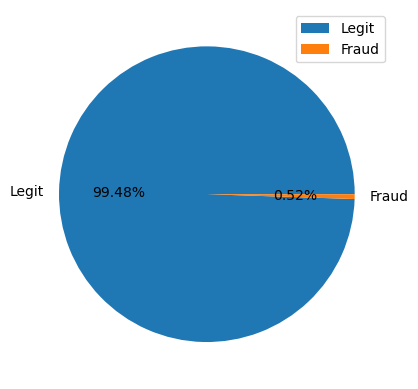

In [35]:
# Visualizing the target variable
plt.pie(fraud_data['is_fraud'].value_counts(normalize=True) * 100,labels=['Legit','Fraud'], autopct='%.2f%%',)
plt.legend()
plt.show()

<font color=blue>**Interpretation**:</font>\
We need to balance our data before modelling.\
Let's visualize our data to understand the key informations and to answer our initial questions.

In [36]:
# let's initialize a separate data containing fraud transactions and legit transactions to analyze trends
fraud = fraud_data[fraud_data["is_fraud"]==1]
legit= fraud_data[fraud_data["is_fraud"]==0]

# Comparing descriptive statistics for overall data's amt, fraud data's amt and legit data's amt in single table
fd= fraud_data["amt"].describe()
f=fraud["amt"].describe()
l=legit["amt"].describe()
c=pd.concat([fd,f,l],axis=1).round(2)
c.columns=['overall_amt_dist','fraud_amt_dist','legit_amt_dist']
c

overall_amt_dist  fraud_amt_dist  legit_amt_dist
count        1852394.00         9651.00      1842743.00
mean              70.06          530.66           67.65
std              159.25          391.03          153.55
min                1.00            1.06            1.00
25%                9.64          240.08            9.61
50%               47.45          390.00           47.24
75%               83.10          902.36           82.56
max            28948.90         1376.04        28948.90

<font color=blue>**Interpretation**:</font>\
The variation in the transaction amount is highest in the fraudulent transactions.\
Whereas, the max amount is way more in legit transaction amount than fraudulent.

In [37]:
# Transaction of mean amount in different categories 
fraud_data.groupby(['is_fraud','category']).agg({'amt':'mean', 'category':'count'}).sort_values('amt', ascending=False)

amt  category
is_fraud category                            
1        shopping_net    998.128725      2219
         shopping_pos    878.913201      1056
         misc_net        798.654577      1182
         entertainment   504.794384       292
         grocery_pos     312.237262      2228
         home            257.479094       265
         misc_pos        212.716894       322
         food_dining     120.678829       205
0        grocery_pos     114.135071    173963
         travel          112.048612     57800
         shopping_pos     73.799294    165407
         shopping_net     72.194496    137103
         misc_net         70.689738     89472
         gas_transport    63.688542    187257
         entertainment    63.181494    133826
         misc_pos         62.252334    113907
         home             57.886732    175195
         kids_pets        57.601378    161423
         health_fitness   54.139079    122368
         grocery_net      53.801150     64703
         food_dining      50.884652    130524
         personal_care    48.096911    129795
1        personal_care    26.110207       290
         health_fitness   20.277622       185
         kids_pets        18.485296       304
         gas_transport    12.231256       772
         grocery_net      12.046914       175
         travel            8.970962       156

<font color=blue>**Interpretation**:</font>
- Internet shopping has the highest mean amount of 998.12 in 2219 fraudulent transactions.
- Offline grocery shopping has the highest mean of 114.13 in 173,963 legit transactions.

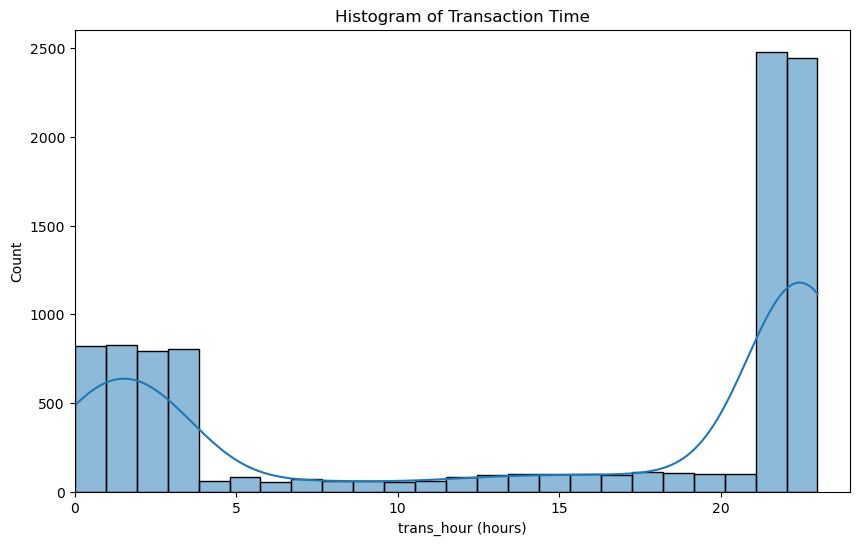

In [38]:
# checking fraud transactions peak hours
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud, x="trans_hour", bins=24, kde=True)
plt.xlim(0, 24)
plt.xlabel("trans_hour (hours)")
plt.title("Histogram of Transaction Time")
plt.show()

<font color=blue>**Interpretation**:</font>\
It shows that maximum fraud transactions have happened in the time span of 10pm-3am.

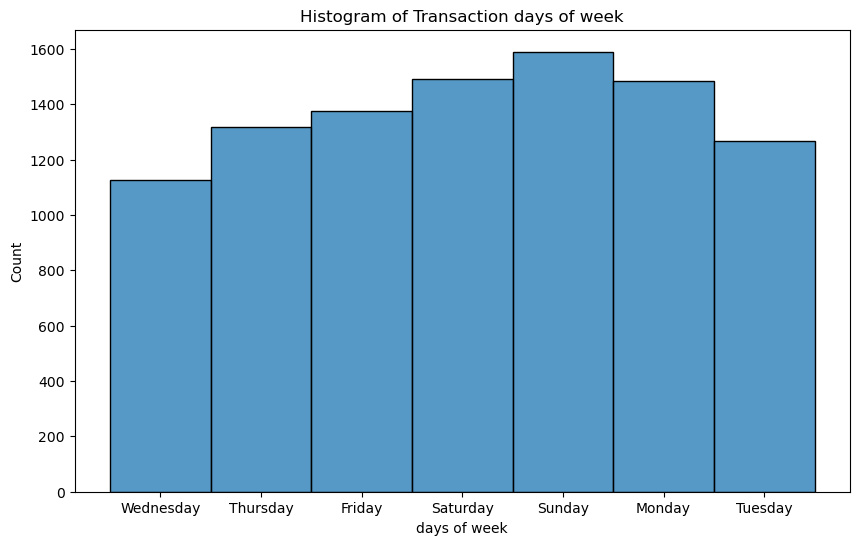

In [39]:
# checking fraud transactions on days of week
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud, x="trans_dayofweek", bins=7)
plt.xlabel("days of week")
plt.title("Histogram of Transaction days of week")
plt.show()

<font color=blue>**Interpretation**:</font>\
It shows that the max fraud transactions has happened on Sunday followed by Saturday and Monday.

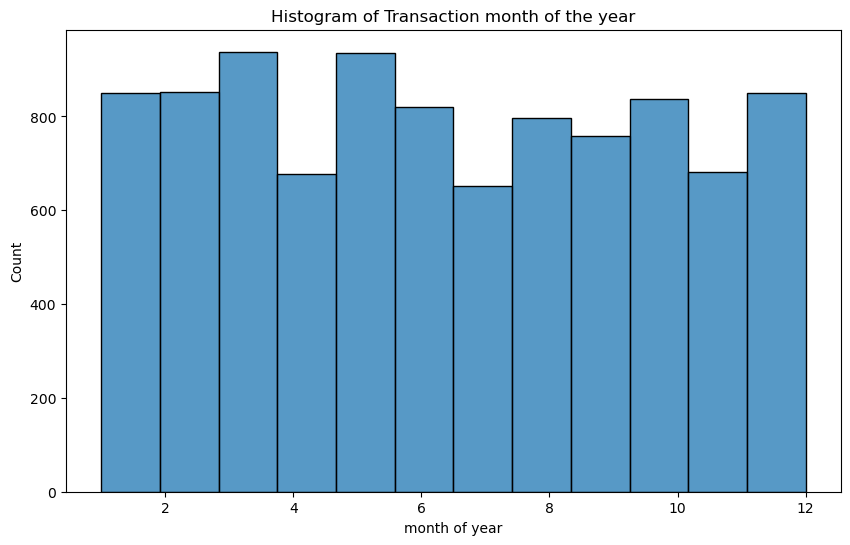

In [40]:
# checking fraud transactions on month of year
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud, x="trans_month", bins=12)
plt.xlabel("month of year")
plt.title("Histogram of Transaction month of the year")
plt.show()

<font color=blue>**Interpretation**:</font>\
It shows that the max fraud transactions occured in March and May

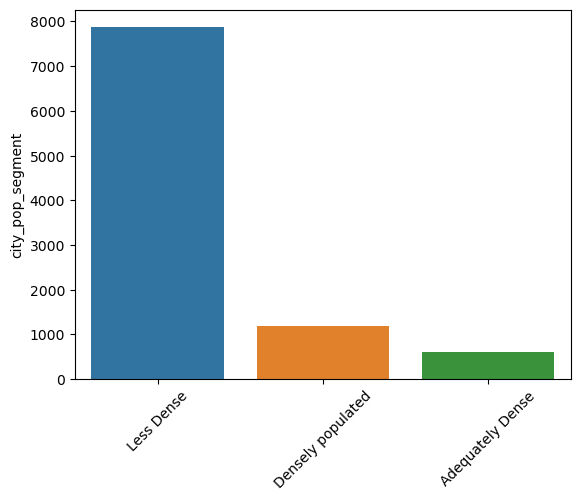

In [41]:
# lets have a look about the fraud transactions done in cities according to their populations

sns.barplot(x=fraud["city_pop_segment"].value_counts().index, y=fraud["city_pop_segment"].value_counts())
plt.xticks(rotation=45)
plt.show()

<font color=blue>**Interpretation**:</font>\
It shows that the max fraud transactions occured in the least densely populated cities.

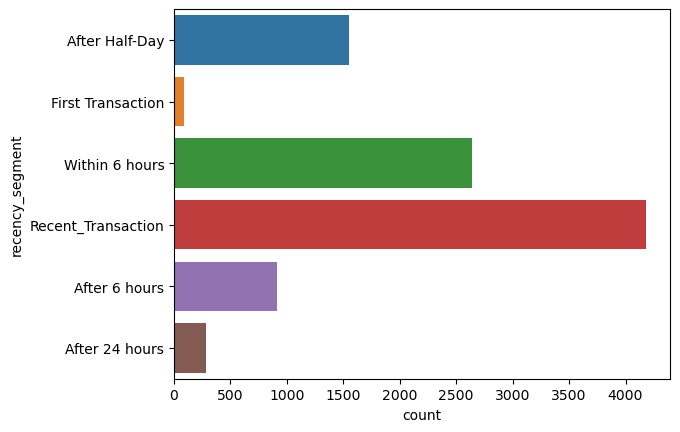

In [42]:
# checking fraud transactions based on recency
sns.countplot(y=fraud.recency_segment)
plt.show()

<font color=blue>**Interpretation**:</font>\
Most fraud transactions were done within one hour of the card's first fraud transaction.

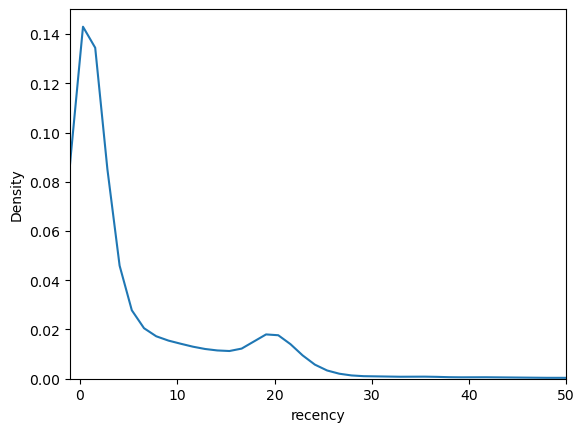

In [43]:
# checking how recent the transaction is can be termed as fraud
sns.kdeplot(fraud.recency)
plt.xlim(right = 50,left = -1)
plt.show()

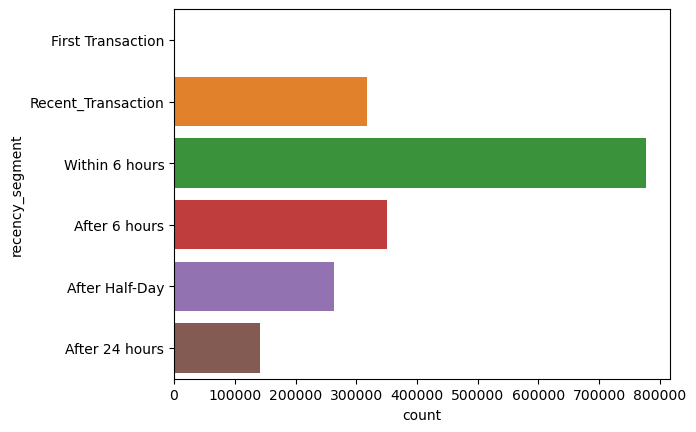

In [44]:
# let's check overall recent transactions
sns.countplot(y=fraud_data.recency_segment)
plt.show()

<font color=blue>**Interpretation**:</font>
If we consider overall data most transactions (both fraud and legit) were done within 6 hours of the first use of the card.

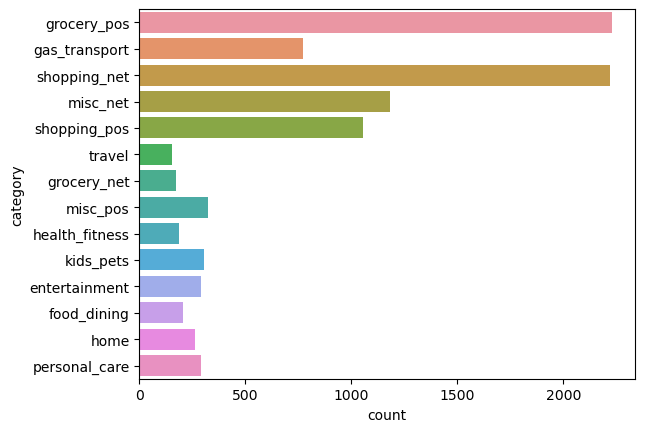

In [45]:
# checking which category have highest number of frauds
sns.countplot(y=fraud.category)
plt.show()

<font color=blue>**Interpretation**:</font>\
It shows that the most fraud transactions were done on online shopping and offline grocery purchases.

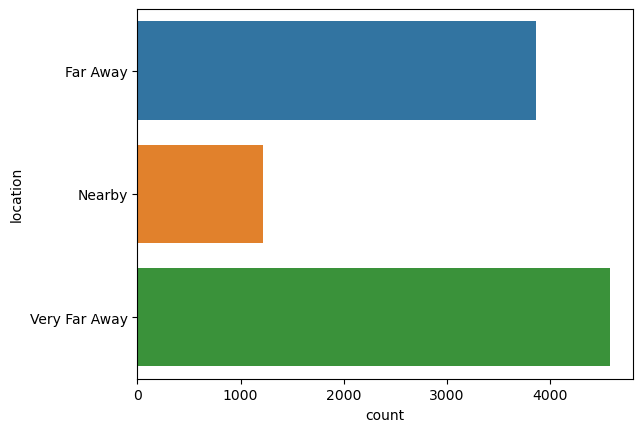

In [46]:
# let's check how far frauds happens from customer's residence
sns.countplot(y=fraud.location)
plt.show()

<font color=blue>**Interpretation**:</font>\
Majority of fraud transactions took place very far from the merchant location.

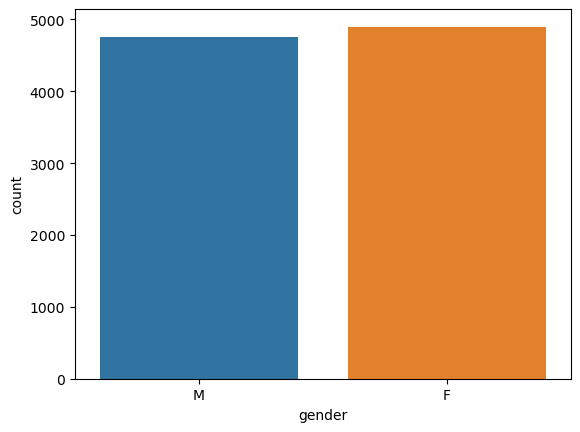

In [47]:
# let's have a look on fraud transactions based on Gender
sns.countplot(x=fraud.gender)
plt.show()

<font color=blue>**Interpretation**:</font>\
The number of fraud transactions done by women are slightly larger than the number of fraud transactions done by men.

### 4.2. Bivariate Analysis

C:\Users\radhi\AppData\Local\Temp\ipykernel_25640\3706665430.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fraud_data_cat = fraud.groupby(by = "category").sum()


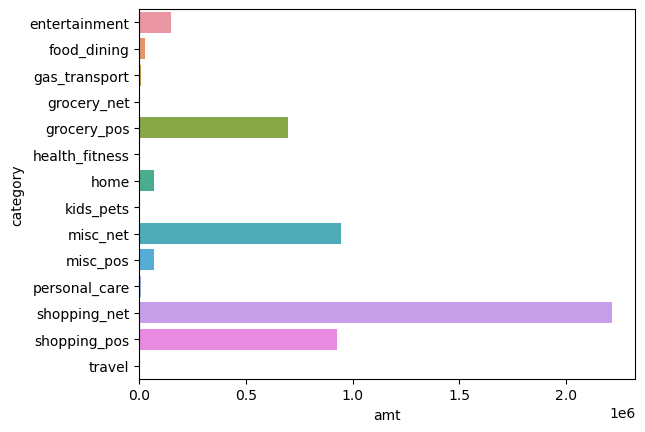

In [48]:
# Let's see in which category the losses are huge
fraud_data_cat = fraud.groupby(by = "category").sum()
sns.barplot(y = fraud_data_cat.index,x=fraud_data_cat.amt)
plt.show()

<font color=blue>**Interpretation**:</font>
Based on the amount, Internet shopping has the highest mean in fraudulent transactions followed by offline grocery shopping.

In [49]:
#Defining a bucket to categorize age into different age groups
def age_group(row):
    rows = row["age"]
    if rows <20:
        return "less than 20"
    elif rows >=20 and rows<30:
        return "20 to 30"
    elif rows >=30 and rows<40:
        return "30 to 40"
    elif rows >=40 and rows<50:
        return "40 to 50"
    elif rows >=50 and rows<60:
        return "50 to 60"
    elif rows >=60 and rows<70:
        return "60 to 70"
    elif rows >=70 and rows<80:
        return "70 to 80"
    elif rows >=80 and rows<90:
        return "80 to 90"
    else:
        return "greater than 90"
fraud["age_group"] = fraud.apply(age_group,axis=1)

C:\Users\radhi\AppData\Local\Temp\ipykernel_25640\1547219867.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud["age_group"] = fraud.apply(age_group,axis=1)


<Axes: xlabel='age_group', ylabel='count'>

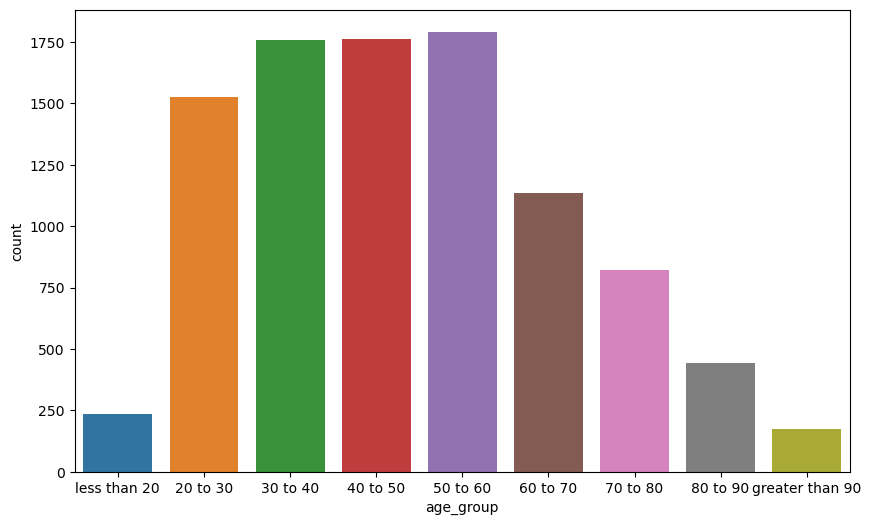

In [50]:
#Plotting fraud transactions for different age groups
plt.figure(figsize=(10, 6))
order = ["less than 20","20 to 30","30 to 40","40 to 50","50 to 60","60 to 70","70 to 80","80 to 90","greater than 90"]
sns.countplot(x="age_group",data=fraud, order = order)


<font color=blue>**Interpretation**:</font>
Majority of fraudulent transactions are done by people between the ages of 30 and 60.

<Axes: xlabel='recency_segment', ylabel='amt'>

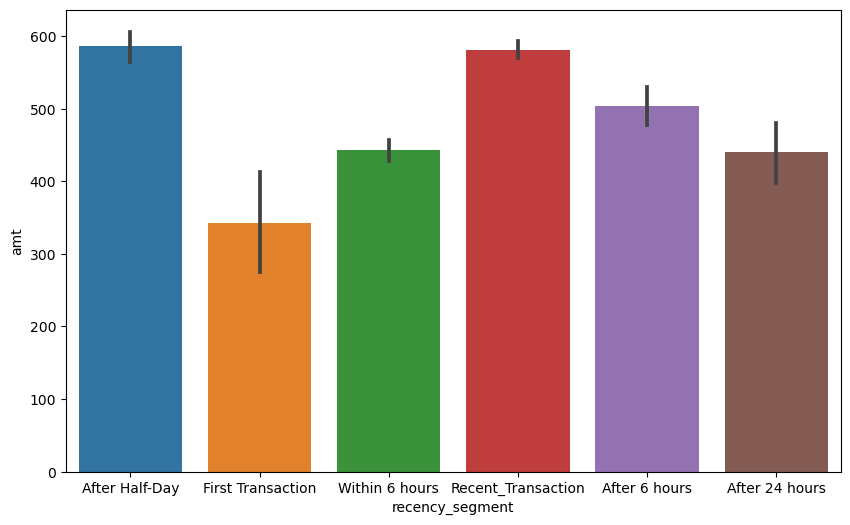

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="recency_segment",y="amt",data=fraud)

<font color=blue>**Interpretation**:</font>
Majority of loss of amount in fraudulent transactions were done within 1 hour of the credit being first used followed by transaction within half a day.

<Axes: xlabel='gender', ylabel='amt'>

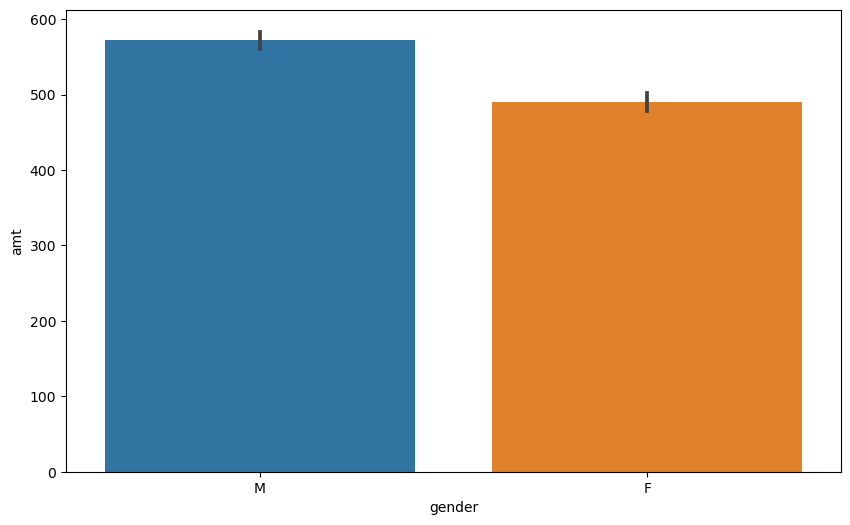

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x="gender",y="amt",data=fraud)

<font color=blue>**Interpretation**:</font>
Though univariate analysis showed that women committed more fraud transactions, the fraud transactions done by men have a higher monetary value.

## 4.  OUTLIERS

In [53]:
#Outlier detection for columns "amt", "age", "displacement", "city_pop" and "recency"

np.percentile(fraud_data['amt'], 50)
q75, q25 = np.percentile(fraud_data['amt'], [75 ,25])
iqr = q75 - q25
a_upper=fraud_data['amt'][fraud_data['amt']>1.5*iqr+q75]
a_lower=fraud_data['amt'][fraud_data['amt']<q25 - 1.5*iqr]


np.percentile(fraud_data['age'], 50)
q75, q25 = np.percentile(fraud_data['age'], [75 ,25])
iqr = q75 - q25
b_upper=fraud_data['age'][fraud_data['age']>1.5*iqr+q75]
b_lower=fraud_data['age'][fraud_data['age']<q25-1.5*iqr]


np.percentile(fraud_data['displacement'], 50)
q75, q25 = np.percentile(fraud_data['displacement'], [75, 25])
iqr = q75 - q25
c_upper=fraud_data['displacement'][fraud_data['displacement']>1.5*iqr+q75]
c_lower=fraud_data['displacement'][fraud_data['displacement']<q25-1.5*iqr]


np.percentile(fraud_data['city_pop'], 50)
q75, q25 = np.percentile(fraud_data['city_pop'], [75, 25])
iqr = q75 - q25
d_upper=fraud_data['city_pop'][fraud_data['city_pop']>1.5*iqr+q75]
d_lower = fraud_data['city_pop'][fraud_data['city_pop']<q25-1.5*iqr]


np.percentile(fraud_data['recency'], 50)
q75, q25 = np.percentile(fraud_data['recency'], [75, 25])
iqr = q75 - q25
e_upper=fraud_data['recency'][fraud_data['recency']>1.5*iqr+q75]
e_lower=fraud_data['recency'][fraud_data['recency']<q25-1.5*iqr]


print("Upper Outliers for column 'amt' are :\n" ,a_upper , len(a_upper))
print("\nLower Outliers for column 'amt' are :\n" ,a_lower , len(a_lower))

print("\nUpper Outliers for column 'age' are :\n" ,b_upper , len(b_upper))
print("\nLower Outliers for column 'age' are :\n" ,b_lower , len(b_lower))

print("\nUpper Outliers for column 'displacement' are :\n" ,c_upper , len(c_upper))
print("\nLower Outliers for column 'displacement' are :\n" ,c_lower , len(c_lower))

print("\nUpper Outliers for column 'city_pop' are :\n" ,d_upper , len(d_upper))
print("\nLower Outliers for column 'city_pop' are :\n" ,d_lower , len(d_lower))

print("\nUpper Outliers for column 'recency' are :\n" ,e_upper , len(e_upper))
print("\nLower Outliers for column 'recency' are :\n" ,e_lower , len(e_lower))



Upper Outliers for column 'amt' are :
 2           220.11
9           198.39
16          327.00
17          341.67
36          207.36
            ...   
1852201     290.11
1852300     255.42
1852304     302.79
1852312    1164.37
1852322     410.05
Name: amt, Length: 95054, dtype: float64 95054

Lower Outliers for column 'amt' are :
 Series([], Name: amt, dtype: float64) 0

Upper Outliers for column 'age' are :
 712721     95.0
714323     95.0
715485     95.0
718680     95.0
718991     95.0
           ... 
1831750    96.0
1835728    96.0
1838685    96.0
1843038    96.0
1849580    96.0
Name: age, Length: 435, dtype: float64 435

Lower Outliers for column 'age' are :
 Series([], Name: age, dtype: float64) 0

Upper Outliers for column 'displacement' are :
 Series([], Name: displacement, dtype: float64) 0

Lower Outliers for column 'displacement' are :
 Series([], Name: displacement, dtype: float64) 0

Upper Outliers for column 'city_pop' are :
 9          151785
12         341043
19       

<font color=blue>**Interpretation**:</font>\
It depicts that the attributes "amt", "age", "city_pop" and "recency" have 95054, 435, 346191, 140675 outliers respectively.


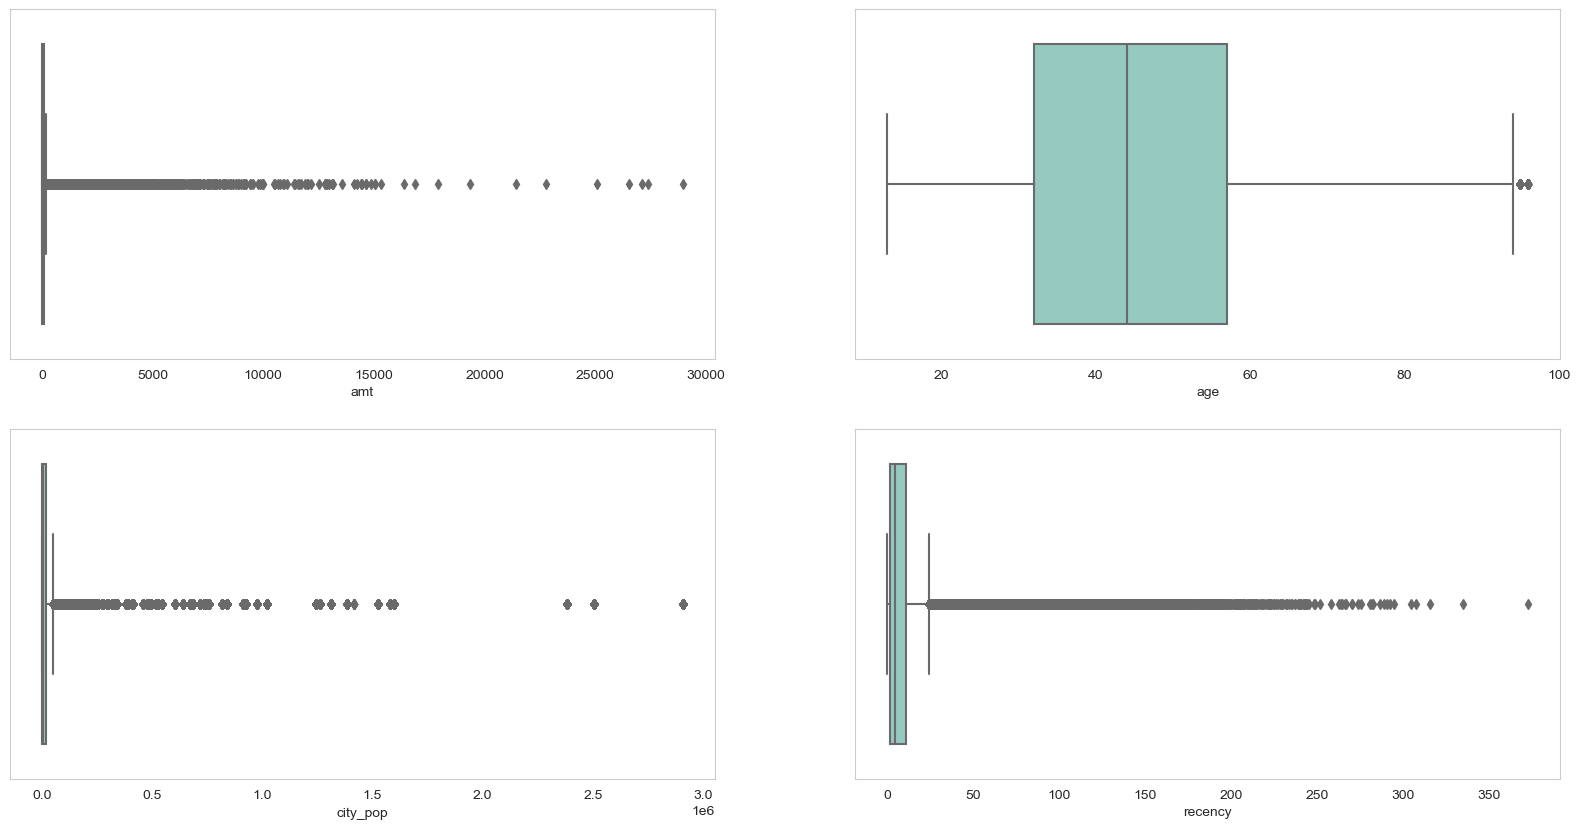

In [54]:
#Visual representation of Outliers
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("Set3")

fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.boxplot(x = 'amt', data = fraud_data, ax=axes[0, 0])
sns.boxplot(x = 'age', data = fraud_data, ax=axes[0, 1])
sns.boxplot(x = 'city_pop', data = fraud_data, ax=axes[1, 0])
sns.boxplot(x = 'recency', data = fraud_data, ax=axes[1, 1])
plt.show()

<font color=blue>**Interpretation**:</font>\
It is clear from the figure that "amt", "city_pop" and "recency' has lot of outliers.
- Age column has a max value of 96 id being detected as outlier. We are going forward with the processing by not considering these values as outliers.
- Outliers in column "recency" would also not be considered as outliers as a the max days elapsed between the two transaction is around 15 days, hence it would not be considered as outlier. Hence we are ignoring the outliers in recency column as well.
- "city_pop" column are having 
- "amt" column have 95054 outliers and these outliers contains approx 70% of fraudulent amount. Since, this data is very crucial to train our model to predict the fraudulent transaction, we will not remove those values but will normalise them.

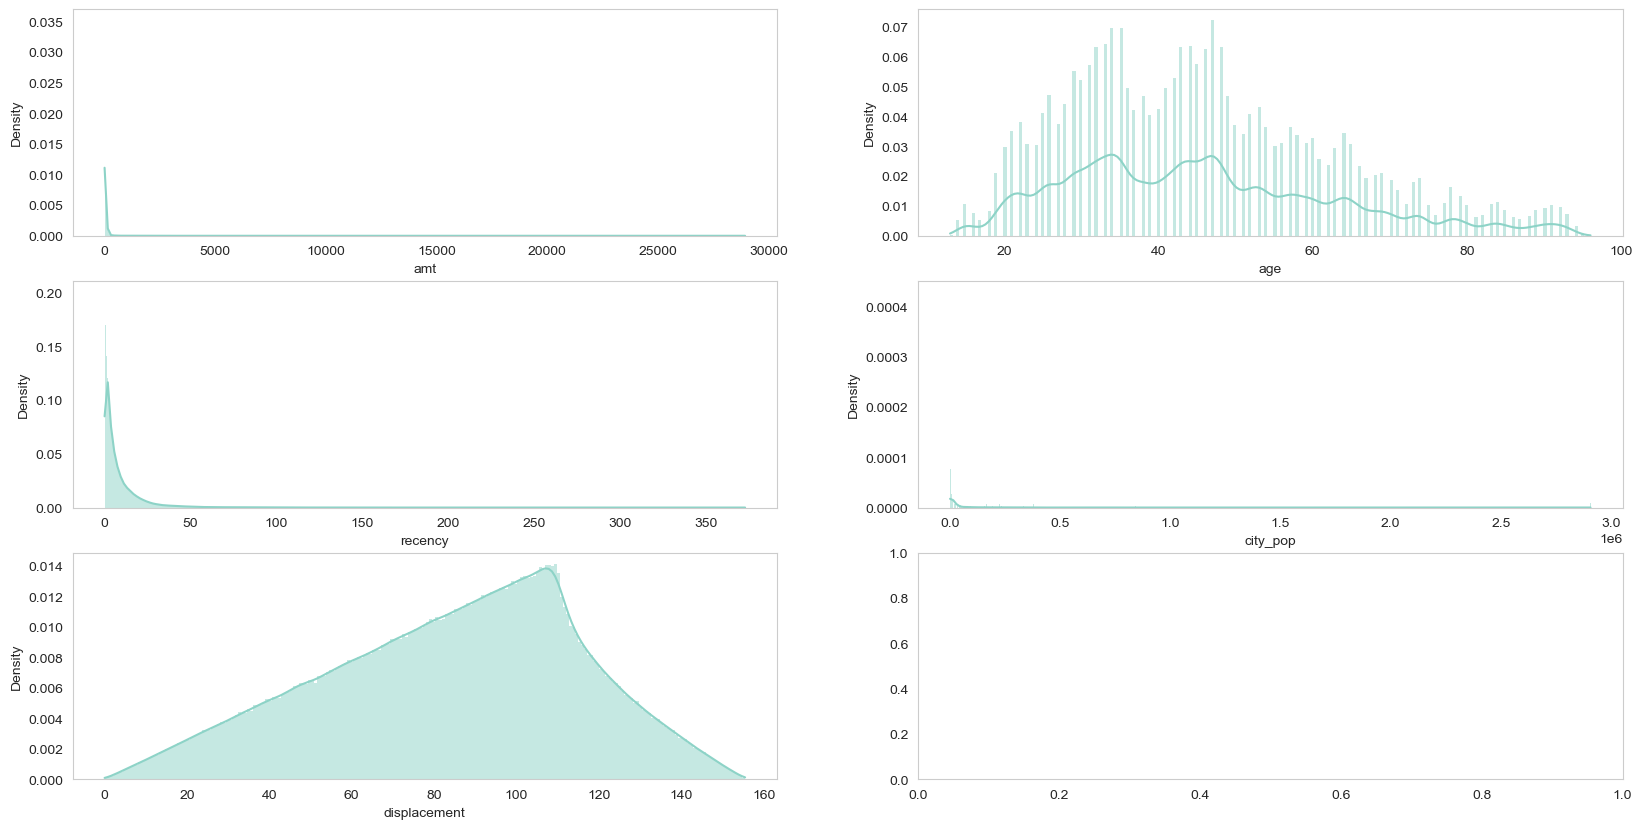

In [55]:
# Distribution of amt, age, city_pop, displacement and recency

fig, axes = plt.subplots(3, 2, figsize=(20,10))
sns.histplot(fraud_data['amt'], kde=True, stat="density", linewidth=0, ax=axes[0, 0])

sns.histplot(fraud_data['age'], kde=True, stat="density", linewidth=0, ax=axes[0, 1])

sns.histplot(fraud_data['recency'], kde=True, stat="density", linewidth=0, ax=axes[1, 0])

sns.histplot(fraud_data['city_pop'], kde=True, stat="density", linewidth=0, ax=axes[1, 1])

sns.histplot(fraud_data['displacement'], kde=True, stat="density", linewidth=0, ax=axes[2, 0])

plt.show()

<font color=blue>**Interpretation**:</font>
The amt variable is normalised using a log function as it has too many outliers.

In [56]:
fraud_data1=fraud_data.copy()

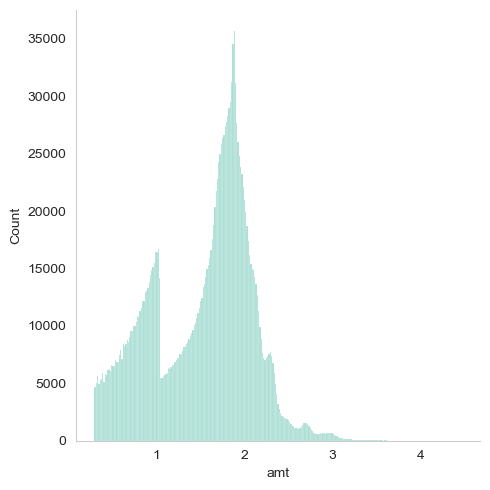

In [57]:
fraud_data1['amt']=fraud_data1.apply(lambda x: math.log10(1+ abs(x['amt'])), axis=1)
sns.displot(fraud_data1['amt'], bins='auto');

In [58]:
fraud_data1.skew()

C:\Users\radhi\AppData\Local\Temp\ipykernel_25640\2917826427.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fraud_data1.skew()


amt             -0.302557
city_pop         5.590805
is_fraud        13.745675
trans_hour      -0.283419
trans_month     -0.130155
age              0.609794
displacement    -0.308703
recency          4.294953
dtype: float64

<font color=blue>**Interpretation**:</font>\
We have a slightly negatively skewed distribution with 2 peaks. We are going to assume it is normal and go forward with the modelling process.

## 5.  Converting categorical values to numerical values

**Before feature selection, we need to create separate dataset for numerical and categorical features and then we'll do label encoding or dummy variable creation.**
- as we have binned "displacement" column under "location", hence we can remove displacement.
- We have binned "city_pop" column under "city_pop_segment", hence can remove "city_pop".
- We have binned the "recency" column under "recency_segment", hence can remove 'recency'.

In [59]:
#after dropping "displacemnt", "city_pop" and "recency", we will left with
data3 = fraud_data.drop(["displacement","city_pop", "recency"],axis = 1)

In [60]:
data3.head()

category     amt gender state  is_fraud  trans_hour  trans_month  \
0       misc_net    4.97      F    NC         0           0            1   
1    grocery_pos  107.23      F    WA         0           0            1   
2  entertainment  220.11      M    ID         0           0            1   
3  gas_transport   45.00      M    MT         0           0            1   
4       misc_pos   41.96      M    VA         0           0            1   

  trans_dayofweek   age       location city_pop_segment    recency_segment  
0         Tuesday  30.0  Very Far Away       Less Dense  First Transaction  
1         Tuesday  40.0         Nearby       Less Dense  First Transaction  
2         Tuesday  56.0  Very Far Away       Less Dense  First Transaction  
3         Tuesday  51.0  Very Far Away       Less Dense  First Transaction  
4         Tuesday  32.0  Very Far Away       Less Dense  First Transaction

In [61]:
data3.dtypes

category             object
amt                 float64
gender               object
state                object
is_fraud              int64
trans_hour            int64
trans_month           int64
trans_dayofweek      object
age                 float64
location             object
city_pop_segment     object
recency_segment      object
dtype: object

In [62]:
# Now lets split the data into categorical dataset and numerical dataset
categorical_data = data3.select_dtypes(exclude=['int64','float64','datetime'])
categorical_data.head()

category gender state trans_dayofweek       location city_pop_segment  \
0       misc_net      F    NC         Tuesday  Very Far Away       Less Dense   
1    grocery_pos      F    WA         Tuesday         Nearby       Less Dense   
2  entertainment      M    ID         Tuesday  Very Far Away       Less Dense   
3  gas_transport      M    MT         Tuesday  Very Far Away       Less Dense   
4       misc_pos      M    VA         Tuesday  Very Far Away       Less Dense   

     recency_segment  
0  First Transaction  
1  First Transaction  
2  First Transaction  
3  First Transaction  
4  First Transaction

**Column "state" has around 51 unique values, hence it would be really difficult to get the dummy variables for 
it, so we will try to do it two ways.**
1. Remove "state" column and then do modelling.
2. Do label encoding for the state and then do modelling.

In [63]:
# Removing "state" column from categorical_data dataset. 
categorical_dataa = categorical_data.drop(columns=["state"])

In [64]:
# we will use one hot encoding to create dummy variables for column "category" and "trans_dayofweek" and 
#"recency_segment" and will encode "F" as 0 and "M" as 1 in "gender" column.

dummies=pd.get_dummies(categorical_dataa[['category','trans_dayofweek', 'recency_segment']])
categorical_dataa=pd.concat([categorical_dataa,dummies],axis=1)


In [65]:
# we will use one hot encoding to create dummy variables for column "category", "trans_dayofweek", "state" and 
#"recency_segment" and will encode "F" as 0 and "M" as 1 in "gender" column.

dummies=pd.get_dummies(categorical_data[['category','trans_dayofweek', 'recency_segment','state']])
categorical_data=pd.concat([categorical_data,dummies],axis=1)


<font color=blue>**Interpretation**:</font>\
*NOTE:*
- Categorical_dataa is the dataset of categorical columns without "state" column.
- Whereas, Categorical_data is the dataset of categorical columns with "state" column.

In [66]:
#Change category F to 0 and M to 1 in gender column and create dummy variable for state names
categorical_data['gender'].replace(('M','F'),('1','0'),inplace=True)
categorical_dataa['gender'].replace(('M','F'),('1','0'),inplace=True)



# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

categorical_data['location']= label_encoder.fit_transform(categorical_data['location']) 
categorical_data['city_pop_segment']= label_encoder.fit_transform(categorical_data['city_pop_segment'])

categorical_dataa['location']= label_encoder.fit_transform(categorical_dataa['location']) 
categorical_dataa['city_pop_segment']= label_encoder.fit_transform(categorical_dataa['city_pop_segment'])

In [67]:
# lets make a copy
categorical_data1 = categorical_data.copy()
categorical_data2 = categorical_dataa.copy()

In [68]:
# now drop column "category", "trans_dayofweek", "recency_segment", "state"
categorical_data.drop(columns= ["category", "trans_dayofweek", "recency_segment","state"], inplace=True)
categorical_data.head()

gender  location  city_pop_segment  category_entertainment  \
0      0         2                 2                       0   
1      0         1                 2                       0   
2      1         2                 2                       1   
3      1         2                 2                       0   
4      1         2                 2                       0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  ...  \
0                     0                        0              0  ...   
1                     1                        0              0  ...   
2                     0                        0              0  ...   
3                     0                        0              0  ...   
4                     0                        0              0  ...   

   state_SD  state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         1         0         0   

   state_WI  state_WV  state_WY  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0  

[5 rows x 81 columns]

In [69]:
# now drop column "category", "trans_dayofweek", "recency_segment"
categorical_dataa.drop(columns= ["category", "trans_dayofweek", "recency_segment"], inplace=True)
categorical_dataa.head()

gender  location  city_pop_segment  category_entertainment  \
0      0         2                 2                       0   
1      0         1                 2                       0   
2      1         2                 2                       1   
3      1         2                 2                       0   
4      1         2                 2                       0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  ...  \
0                     0                        0              0  ...   
1                     1                        0              0  ...   
2                     0                        0              0  ...   
3                     0                        0              0  ...   
4                     0                        0              0  ...   

   trans_dayofweek_Sunday  trans_dayofweek_Thursday  trans_dayofweek_Tuesday  \
0                       0                         0                        1   
1                       0                         0                        1   
2                       0                         0                        1   
3                       0                         0                        1   
4                       0                         0                        1   

   trans_dayofweek_Wednesday  recency_segment_After 24 hours  \
0                          0                               0   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               0   

   recency_segment_After 6 hours  recency_segment_After Half-Day  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   recency_segment_First Transaction  recency_segment_Recent_Transaction  \
0                                  1                                   0   
1                                  1                                   0   
2                                  1                                   0   
3                                  1                                   0   
4                                  1                                   0   

   recency_segment_Within 6 hours  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 30 columns]

In [70]:
# Lets create a numerical dataset out of data3 dataset
numerical_data = data3.select_dtypes(exclude=['object'])
numerical_data.head()


amt  is_fraud  trans_hour  trans_month   age
0    4.97         0           0            1  30.0
1  107.23         0           0            1  40.0
2  220.11         0           0            1  56.0
3   45.00         0           0            1  51.0
4   41.96         0           0            1  32.0

In [71]:
# separate target_variable "is_fraud"
target_var = numerical_data.is_fraud

In [72]:
numerical_data.drop(columns = ["is_fraud"], inplace = True)

In [73]:
# standardize the numerical variables and not the label encoded variables.
# Use StandardScaler for Min-max normalization
from sklearn.preprocessing import MinMaxScaler
col= numerical_data.columns

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(numerical_data)
numerical_data_scaled = pd.DataFrame(np_scaled, columns=col)
numerical_data_scaled


amt  trans_hour  trans_month       age
0        0.000137         0.0          0.0  0.204819
1        0.003670         0.0          0.0  0.325301
2        0.007569         0.0          0.0  0.518072
3        0.001520         0.0          0.0  0.457831
4        0.001415         0.0          0.0  0.228916
...           ...         ...          ...       ...
1852389  0.001477         1.0          1.0  0.493976
1852390  0.003829         1.0          1.0  0.096386
1852391  0.002967         1.0          1.0  0.313253
1852392  0.000241         1.0          1.0  0.506024
1852393  0.001283         1.0          1.0  0.168675

[1852394 rows x 4 columns]

In [74]:
# Let's combine the categorical_data and numerical_data_scaled and target_var together.
data3 = pd.concat([categorical_data, numerical_data_scaled, target_var], axis=1)
data3.head()

gender  location  city_pop_segment  category_entertainment  \
0      0         2                 2                       0   
1      0         1                 2                       0   
2      1         2                 2                       1   
3      1         2                 2                       0   
4      1         2                 2                       0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  ...  \
0                     0                        0              0  ...   
1                     1                        0              0  ...   
2                     0                        0              0  ...   
3                     0                        0              0  ...   
4                     0                        0              0  ...   

   state_VT  state_WA  state_WI  state_WV  state_WY       amt  trans_hour  \
0         0         0         0         0         0  0.000137         0.0   
1         0         1         0         0         0  0.003670         0.0   
2         0         0         0         0         0  0.007569         0.0   
3         0         0         0         0         0  0.001520         0.0   
4         0         0         0         0         0  0.001415         0.0   

   trans_month       age  is_fraud  
0          0.0  0.204819         0  
1          0.0  0.325301         0  
2          0.0  0.518072         0  
3          0.0  0.457831         0  
4          0.0  0.228916         0  

[5 rows x 86 columns]

In [75]:
# Let's combine the categorical_dataa and numerical_data_scaled and target_var together.
data4 = pd.concat([categorical_dataa, numerical_data_scaled, target_var], axis=1)
data4.head()

gender  location  city_pop_segment  category_entertainment  \
0      0         2                 2                       0   
1      0         1                 2                       0   
2      1         2                 2                       1   
3      1         2                 2                       0   
4      1         2                 2                       0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  ...  \
0                     0                        0              0  ...   
1                     1                        0              0  ...   
2                     0                        0              0  ...   
3                     0                        0              0  ...   
4                     0                        0              0  ...   

   recency_segment_After 6 hours  recency_segment_After Half-Day  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   recency_segment_First Transaction  recency_segment_Recent_Transaction  \
0                                  1                                   0   
1                                  1                                   0   
2                                  1                                   0   
3                                  1                                   0   
4                                  1                                   0   

   recency_segment_Within 6 hours       amt  trans_hour  trans_month  \
0                               0  0.000137         0.0          0.0   
1                               0  0.003670         0.0          0.0   
2                               0  0.007569         0.0          0.0   
3                               0  0.001520         0.0          0.0   
4                               0  0.001415         0.0          0.0   

        age  is_fraud  
0  0.204819         0  
1  0.325301         0  
2  0.518072         0  
3  0.457831         0  
4  0.228916         0  

[5 rows x 35 columns]

In [76]:
data3.shape

(1852394, 86)

In [77]:
data4.shape

(1852394, 35)

In [78]:
#Creating a copy of the dataframe and saving it
data3.to_csv('data3.csv')

## 6.  Modeling

### Splitting X and y to prepare for the modelling phase

In [79]:
#Defining X and y
#dataset with label encoded "states"

X = data3.drop(columns="is_fraud") #independent columns
y = data3["is_fraud"]   #target column i.e is_fraud 

In [80]:
#Defining X and y
#dataset without the variable "states"

X1 = data4.drop(columns="is_fraud") #independent columns
y1 = data4["is_fraud"]   #target column i.e is_fraud 

## Approach 1:
- Step1: Balance the data 
- Step2: Split into train and test data
- Step3: Modelling

#### Step 1: Balance the data

In [81]:
# first balance the data and then split and then do modelling
under_sampler = RandomUnderSampler(random_state=42)
X_s, y_s = under_sampler.fit_resample(X, y)


In [82]:
# first balance the data and then split and then do modelling
under_sampler = RandomUnderSampler(random_state=42)
X1_s, y1_s = under_sampler.fit_resample(X1, y1)

In [83]:
y_s.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

In [84]:
y1_s.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

#### Step 2: Split into train and test data

In [85]:
#Now split the dataset into train and test dataset
X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s,y_s,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X_s_train.shape, X_s_test.shape, y_s_train.shape, y_s_test.shape)

(15441, 85)

(3861, 85)

(15441,)

(3861,)

In [86]:
#Now split the dataset into train and test dataset
X1_s_train,X1_s_test,y1_s_train,y1_s_test = train_test_split(X1_s,y1_s,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X1_s_train.shape, X1_s_test.shape, y1_s_train.shape, y1_s_test.shape)

(15441, 34)

(3861, 34)

(15441,)

(3861,)

#### Step 3: Modelling

We have implemented logistic regression and KNearest Neighbour models to train our data.

## 6.1. LOGISTIC REGRESSION MODEL

### 6.1.1 Modelling data with "state" input variable

In [87]:
lr = LogisticRegression(fit_intercept = False, C = 1e7)
lr.fit(X_s_train,y_s_train)

C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000.0, fit_intercept=False)

In [88]:
#Predict the test dataset
y_pred=lr.predict(X_s_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_s_test, y_s_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [89]:
cnf_matrix = metrics.confusion_matrix(y_s_test, y_pred)
cnf_matrix

array([[1667,  244],
       [ 355, 1595]], dtype=int64)

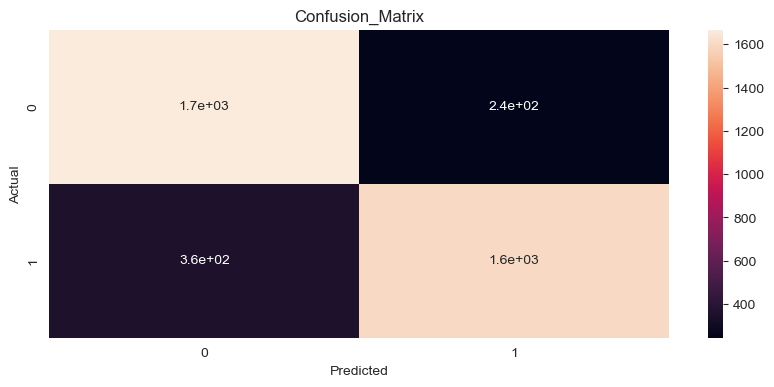

In [90]:
# Assuming you have actual labels (y_s_test) and predicted labels (y_pred)
cnf_matrix = pd.crosstab(y_s_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))


# Use seaborn's heatmap to visualize the confusion matrix
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion_Matrix')
plt.show()

<font color=blue>**Interpretation**:</font>
- The model correctly identified 1667 legit transactions and 1595 fraud transactions
- The model has an accuracy of 84%

In [91]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_s_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_s_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_s_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_s_test, y_pred)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_s_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.844859
Precision: 0.867319
Recall: 0.817949
F1 score: 0.841911
ROC AUC: 0.845133


### 6.1.2 Modelling data without "state" input variable

In [92]:
lr = LogisticRegression(fit_intercept = False, C = 1e7)
lr.fit(X1_s_train,y1_s_train)

C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000.0, fit_intercept=False)

In [93]:
#Predict the test dataset
y1_pred=lr.predict(X1_s_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X1_s_test, y1_s_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [94]:
cnf_matrix = metrics.confusion_matrix(y1_s_test, y1_pred)
cnf_matrix

array([[1703,  208],
       [ 369, 1581]], dtype=int64)

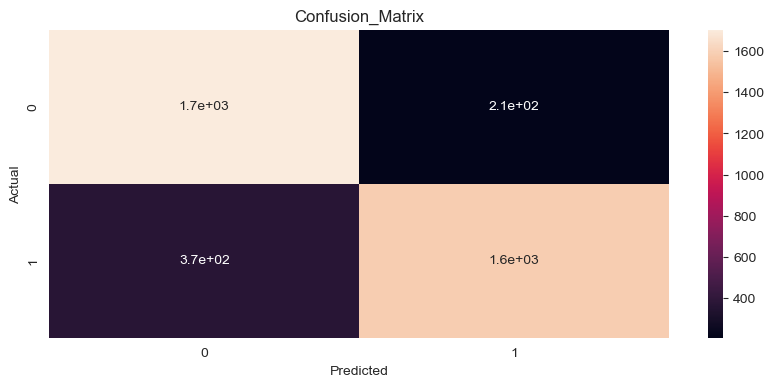

In [95]:
# Assuming you have actual labels (y_s_test) and predicted labels (y_pred)
cnf_matrix = pd.crosstab(y1_s_test, y1_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))


# Use seaborn's heatmap to visualize the confusion matrix
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion_Matrix')
plt.show()

<font color=blue>**Interpretation**:</font>
- The model correctly identified 1706 legit transactions and 1582 fraud transactions
- The model has an accuracy of 85% which is slightly higher than the model that was trained with "states" variable.

In [96]:
# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(y1_s_test, y1_pred)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision1 = precision_score(y1_s_test, y1_pred)
print('Precision: %f' % precision1)
# recall: tp / (tp + fn)
recall1 = recall_score(y1_s_test, y1_pred)
print('Recall: %f' % recall1)
# f1: 2 tp / (2 tp + fp + fn)
f1_1 = f1_score(y1_s_test, y1_pred)
print('F1 score: %f' % f1_1)
# ROC AUC
auc1 = roc_auc_score(y1_s_test, y1_pred)
print('ROC AUC: %f' % auc1)

Accuracy: 0.850557
Precision: 0.883734
Recall: 0.810769
F1 score: 0.845681
ROC AUC: 0.850963


### Comparing both the models

In [97]:
# Comapring the performace of model with both dataset
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Model_with_state': [accuracy, precision, recall, f1, auc],
    'Model_without_state': [accuracy1, precision1, recall1, f1_1, auc1],
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

      Metric  Model_with_state  Model_without_state
0   Accuracy          0.844859             0.850557
1  Precision          0.867319             0.883734
2     Recall          0.817949             0.810769
3   F1 Score          0.841911             0.845681
4    ROC AUC          0.845133             0.850963


<font color=blue>**Interpretation**:</font>

It can be observed that the model works better when the "state" column is not included as an input variable. As all the metrices are higher for the model without "states" column.

## 6.2. KNN MODEL

### 6.2.1 Modelling data with "state" input variable

In [141]:
KNN = KNeighborsClassifier(n_neighbors = 29) #considering K = 29
model_fit=KNN.fit(X_s_train, y_s_train) 

# Predicting the Test set results
y_pred = KNN.predict(X_s_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_s_test, y_pred)
cm

array([[1354,  557],
       [ 395, 1555]], dtype=int64)

<Axes: xlabel='Predicted', ylabel='Actual'>

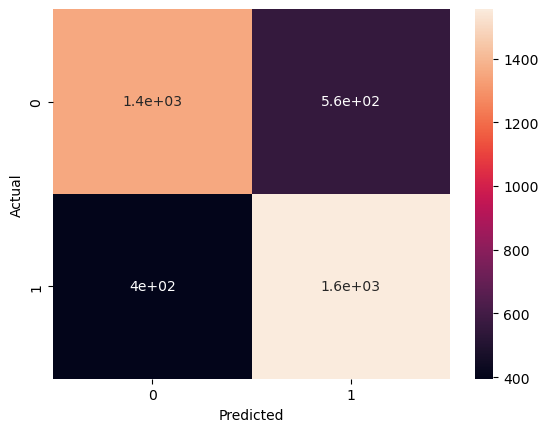

In [142]:
#Confusion Matrix
cnf_matrix = pd.crosstab(y_s_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)


<font color=blue>**Interpretation**:</font>
- The model correctly identified 1354 legit transactions and 1555 fraud transactions


In [143]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_s_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_s_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_s_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_s_test, y_pred)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_s_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.753432
Precision: 0.736269
Recall: 0.797436
F1 score: 0.765633
ROC AUC: 0.752983


<font color=blue>**Interpretation**:</font>
- The model has a 75% accuracy.

In [101]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_s_train, y_s_train)
    y_preds = classifier.predict(X_s_test)
    print("Accuracy for k =", k, "is:", accuracy_score(y_s_test, y_preds)) 


Accuracy for k = 24 is: 0.7412587412587412
Accuracy for k = 25 is: 0.746956746956747
Accuracy for k = 26 is: 0.7464387464387464
Accuracy for k = 27 is: 0.7531727531727531
Accuracy for k = 28 is: 0.7521367521367521
Accuracy for k = 29 is: 0.7534317534317534


<font color=blue>**Interpretation**:</font>
- k=29 has the highest accuracy, therefore k=29 is used for the model.

### 6.2.1 Modelling data without "state" input variable

In [102]:
# Fitting classifier to the Training set without "state" column in it
KNN = KNeighborsClassifier(n_neighbors = 27) #considering K = 27
model_fit=KNN.fit(X1_s_train, y1_s_train) 

# Predicting the Test set results
y1_pred = KNN.predict(X1_s_test)

# Making the Confusion Matrix
cm = confusion_matrix(y1_s_test, y1_pred)
cm

array([[1388,  523],
       [ 386, 1564]], dtype=int64)

<Axes: xlabel='Predicted', ylabel='Actual'>

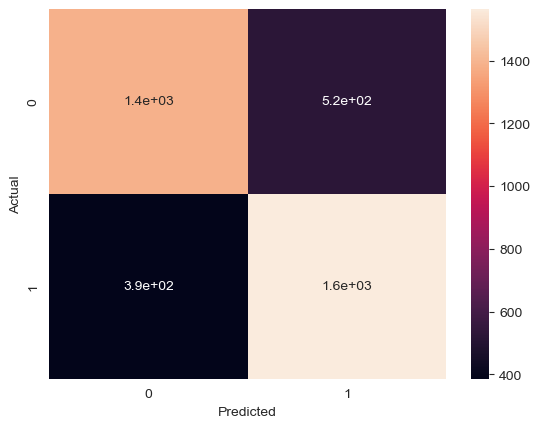

In [103]:
#Confusion Matrix
cnf_matrix = pd.crosstab(y1_s_test, y1_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

<font color=blue>**Interpretation**:</font>
- The model correctly identified 1388 legit transactions and 1564 fraud transactions


In [104]:
# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(y1_s_test, y1_pred)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision1 = precision_score(y1_s_test, y1_pred)
print('Precision: %f' % precision1)
# recall: tp / (tp + fn)
recall1 = recall_score(y1_s_test, y1_pred)
print('Recall: %f' % recall1)
# f1: 2 tp / (2 tp + fp + fn)
f1_1 = f1_score(y1_s_test, y1_pred)
print('F1 score: %f' % f1_1)
# ROC AUC
auc1 = roc_auc_score(y1_s_test, y1_pred)
print('ROC AUC: %f' % auc1)

Accuracy: 0.764569
Precision: 0.749401
Recall: 0.802051
F1 score: 0.774833
ROC AUC: 0.764186


<font color=blue>**Interpretation**:</font>
- The model has an accuracy of 76%.

In [105]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X1_s_train, y1_s_train)
    y1_preds = classifier.predict(X1_s_test)
    print("Accuracy for k =", k, "is:", accuracy_score(y1_s_test, y1_preds)) 


Accuracy for k = 1 is: 0.725977725977726
Accuracy for k = 2 is: 0.7075887075887076
Accuracy for k = 3 is: 0.7264957264957265
Accuracy for k = 4 is: 0.7197617197617198
Accuracy for k = 5 is: 0.7267547267547267
Accuracy for k = 6 is: 0.7187257187257188
Accuracy for k = 7 is: 0.7205387205387206
Accuracy for k = 8 is: 0.7223517223517224
Accuracy for k = 9 is: 0.7213157213157213
Accuracy for k = 10 is: 0.7223517223517224
Accuracy for k = 11 is: 0.7187257187257188
Accuracy for k = 12 is: 0.7249417249417249
Accuracy for k = 13 is: 0.7264957264957265
Accuracy for k = 14 is: 0.728049728049728
Accuracy for k = 15 is: 0.7337477337477337
Accuracy for k = 16 is: 0.7355607355607355
Accuracy for k = 17 is: 0.7407407407407407
Accuracy for k = 18 is: 0.7417767417767418
Accuracy for k = 19 is: 0.7420357420357421
Accuracy for k = 20 is: 0.7454027454027454
Accuracy for k = 21 is: 0.75006475006475
Accuracy for k = 22 is: 0.7464387464387464
Accuracy for k = 23 is: 0.7567987567987567
Accuracy for k = 24 is: 

### Comparing both the models

In [106]:
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Model_with_state': [accuracy, precision, recall, f1, auc],
    'Model_without_state': [accuracy1, precision1, recall1, f1_1, auc1],
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

      Metric  Model_with_state  Model_without_state
0   Accuracy          0.753432             0.764569
1  Precision          0.736269             0.749401
2     Recall          0.797436             0.802051
3   F1 Score          0.765633             0.774833
4    ROC AUC          0.752983             0.764186


<font color=blue>**Interpretation**:</font>

It can be observed that the model works better when the "state" column is not included as an input variable.

## ROC Curve

C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


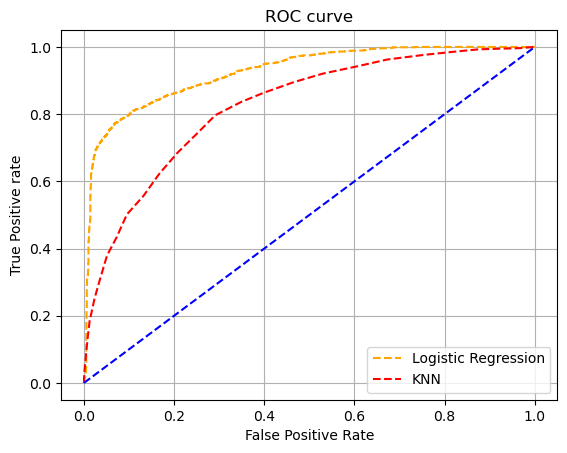

In [107]:
# fit model
lr.fit(X_s_train, y_s_train)
KNN.fit(X_s_train, y_s_train)



# predict probabilities
pred_prob1 = lr.predict_proba(X_s_test)
pred_prob2 = KNN.predict_proba(X_s_test)



from sklearn.metrics import roc_curve# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_s_test, pred_prob1[:,1], pos_label=1)# roc curve for tpr = fpr
fpr2, tpr2, thresh2 = roc_curve(y_s_test, pred_prob2[:,1], pos_label=1)# roc curve for tpr = fpr


random_probs = [0 for i in range(len(y_s_test))]
p_fpr, p_tpr, _ = roc_curve(y_s_test, random_probs, pos_label=1)

plt.style.use('default')# plot roc curves
plt.grid(None)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


<font color=blue>**Interpretation**:</font>
ROC clearly states that Logistic regression works better as with less false alarms it has higher sensitivity.

## Approach 2:
- Step1: Split into train and test data
- Step2: Balance the data 
- Step3: Modelling

#### Step 1: Split the data into train and test data

In [108]:
#Datset with "state" column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1481915, 85)

(370479, 85)

(1481915,)

(370479,)

In [109]:
#Dataset without "state" column
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(1481915, 34)

(370479, 34)

(1481915,)

(370479,)

#### Step 2: Balance the data

In [110]:
# Now balancing the train data with "state" column.
X_train_res, y_train_res = under_sampler.fit_resample(X_train, y_train)

y_train_res.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

In [111]:
# Now balancing the train data without "state" column.
X1_train_res, y1_train_res = under_sampler.fit_resample(X1_train, y1_train)

y1_train_res.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

#### Step 3: Modelling

The data has been modelled on logistic regression and KNearest Neighbour methods.

## 6.3. LOGISTIC REGRESSION MODEL

### 6.3.1 Modelling data without "state" input variable

In [112]:
lr = LogisticRegression(fit_intercept = False, C = 1e7)
lr.fit(X_train_res,y_train_res)

C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000.0, fit_intercept=False)

In [113]:
#Predict the test dataset
y_pred=lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [114]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[329212,  39336],
       [   406,   1525]], dtype=int64)

<font color=blue>**Interpretation**:</font>
- The model correctly identified 329209 legit transactions and 1525 fraud transactions


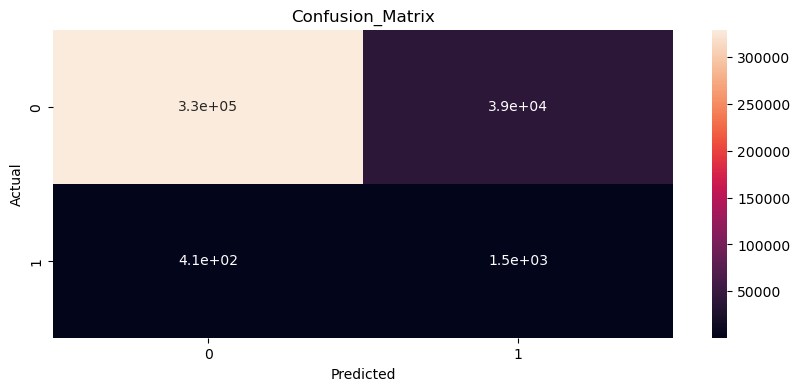

In [115]:
# Assuming you have actual labels (y_test) and predicted labels (y_pred)

cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))


# Use seaborn's heatmap to visualize the confusion matrix
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion_Matrix')
plt.show()

In [116]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.892728
Precision: 0.037322
Recall: 0.789746
F1 score: 0.071275
ROC AUC: 0.841507


<font color=blue>**Interpretation**:</font>
- The model has an accuracy of 89.2%
- Accuracy is higher but the precision is very low i.e. approx 3.7%, that means the true positives predicted are very less among the whole postive predcited values.

### 6.3.2 Modelling data without "state" input variable

In [117]:
#Lets create model LOGISTIC REGRESSION MODEL
lr = LogisticRegression(fit_intercept = False, C = 1e7)
lr.fit(X1_train_res,y1_train_res)

C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000.0, fit_intercept=False)

In [118]:
#Predict the test dataset
y_pred1=lr.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X1_test, y1_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [119]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred1)
cnf_matrix

array([[330087,  38461],
       [   396,   1535]], dtype=int64)

<font color=blue>**Interpretation**:</font>
- The model correctly identified 330210 legit transactions and 1535 fraud transactions


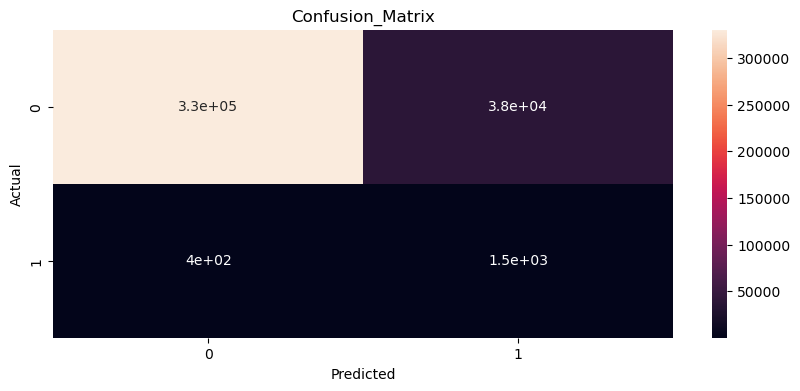

In [120]:
# Assuming you have actual labels (y_test) and predicted labels (y_pred)

cnf_matrix = pd.crosstab(y1_test, y_pred1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))


# Use seaborn's heatmap to visualize the confusion matrix
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion_Matrix')
plt.show()

In [121]:
# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(y1_test, y_pred1)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision1 = precision_score(y1_test, y_pred1)
print('Precision: %f' % precision1)
# recall: tp / (tp + fn)
recall1 = recall_score(y1_test, y_pred1)
print('Recall: %f' % recall1)
# f1: 2 tp / (2 tp + fp + fn)
f1_1 = f1_score(y1_test, y_pred1)
print('F1 score: %f' % f1_1)
# ROC AUC
auc1 = roc_auc_score(y1_test, y_pred1)
print('ROC AUC: %f' % auc1)

Accuracy: 0.895117
Precision: 0.038379
Recall: 0.794925
F1 score: 0.073223
ROC AUC: 0.845283


<font color=blue>**Interpretation**:</font>
- The model has an accuracy of 89.5%

### Comparing both the models

In [122]:
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Model_with_state': [accuracy, precision, recall, f1, auc],
    'Model_without_state': [accuracy1, precision1, recall1, f1_1, auc1],
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

      Metric  Model_with_state  Model_without_state
0   Accuracy          0.892728             0.895117
1  Precision          0.037322             0.038379
2     Recall          0.789746             0.794925
3   F1 Score          0.071275             0.073223
4    ROC AUC          0.841507             0.845283


<font color=blue>**Interpretation**:</font>\
There is no significant difference in the metrics for both the model containing "state" column and not containing it.

## 6.4. KNN MODEL

### 6.4.1 Modelling data with "state" input variable

In [123]:
# Fitting classifier to the Training set with "state" column in it
KNN = KNeighborsClassifier(n_neighbors = 3) #considering K = 3
model_fit=KNN.fit(X_train_res, y_train_res) 

# Predicting the Test set results
y_pred = KNN.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[263261, 105287],
       [   467,   1464]], dtype=int64)

<Axes: xlabel='Predicted', ylabel='Actual'>

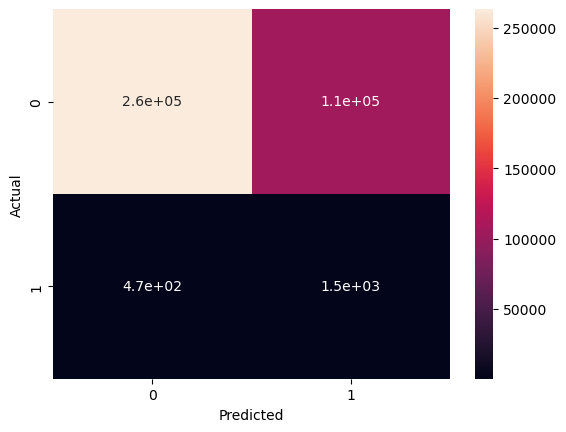

In [124]:
#Confusion Matrix
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

<font color=blue>**Interpretation**:</font>
- The model correctly predicted 263261 legit transactions and 1464 fraud transactions.

In [125]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.714548
Precision: 0.013714
Recall: 0.758156
F1 score: 0.026941
ROC AUC: 0.736238


<font color=blue>**Interpretation**:</font>
- The model has an accuracy of 71.4%

In [126]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train_res, y_train_res)
    y_preds = classifier.predict(X_test)
    print("Accuracy for k =", k, "is:", accuracy_score(y_test, y_preds))
    

Accuracy for k = 1 is: 0.6850185840492984
Accuracy for k = 2 is: 0.8542535474345374
Accuracy for k = 3 is: 0.7145479230941565
Accuracy for k = 4 is: 0.819838641326499
Accuracy for k = 5 is: 0.7224431074365888
Accuracy for k = 6 is: 0.8012977793613133
Accuracy for k = 7 is: 0.7237306298062778
Accuracy for k = 8 is: 0.7883361809981132
Accuracy for k = 9 is: 0.7251639094253656
Accuracy for k = 10 is: 0.7802088647399718
Accuracy for k = 11 is: 0.7249884608844226
Accuracy for k = 12 is: 0.7730370682278888
Accuracy for k = 13 is: 0.7255148065072514
Accuracy for k = 14 is: 0.7683566409971955
Accuracy for k = 15 is: 0.7255310017571847
Accuracy for k = 16 is: 0.7640028179734883
Accuracy for k = 17 is: 0.725792824964438
Accuracy for k = 18 is: 0.7602266255307318
Accuracy for k = 19 is: 0.7250640387174442
Accuracy for k = 20 is: 0.757098243085303
Accuracy for k = 21 is: 0.7247833210519354
Accuracy for k = 22 is: 0.7551980004264749
Accuracy for k = 23 is: 0.725536400173829
Accuracy for k = 24 is: 

### 6.4.2 Modelling data without "state" input variable

In [127]:
# Fitting classifier to the Training set with "state" column in it
KNN = KNeighborsClassifier(n_neighbors = 27) #considering K = 27
model_fit=KNN.fit(X1_train_res, y1_train_res) 

# Predicting the Test set results
y_pred1 = KNN.predict(X1_test)

# Making the Confusion Matrix
cm = confusion_matrix(y1_test, y_pred1)
cm

array([[271649,  96899],
       [   431,   1500]], dtype=int64)

<Axes: xlabel='Predicted', ylabel='Actual'>

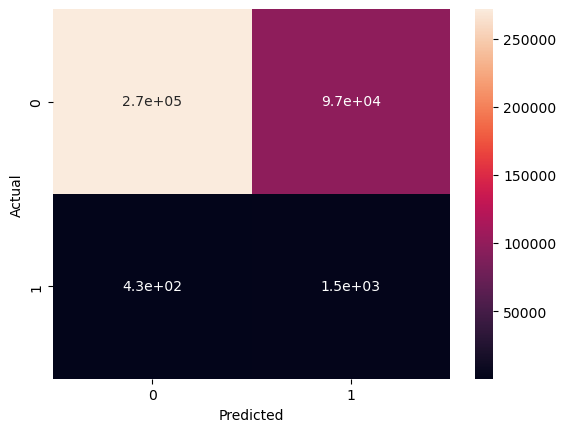

In [128]:
#Confusion Matrix
cnf_matrix = pd.crosstab(y1_test, y_pred1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

<font color=blue>**Interpretation**:</font>
- The model correctly predicted 271649 legit transactions and 1500 fraud transactions.

In [129]:
# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(y1_test, y_pred1)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision1 = precision_score(y1_test, y_pred1)
print('Precision: %f' % precision1)
# recall: tp / (tp + fn)
recall1 = recall_score(y1_test, y_pred1)
print('Recall: %f' % recall1)
# f1: 2 tp / (2 tp + fp + fn)
f1_1 = f1_score(y1_test, y_pred1)
print('F1 score: %f' % f1_1)
# ROC AUC
auc1 = roc_auc_score(y1_test, y_pred1)
print('ROC AUC: %f' % auc1)

Accuracy: 0.737286
Precision: 0.015244
Recall: 0.776800
F1 score: 0.029901
ROC AUC: 0.756939


<font color=blue>**Interpretation**:</font>
- The model has an accuracy of 73.7%.

In [144]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X1_train, y1_train)
    y_preds = classifier.predict(X1_test)
    print("Accuracy for k =", k, "is:", accuracy_score(y1_test, y_preds)) 

KeyboardInterrupt: 

### Comparing both the models

In [131]:
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Model_with_state': [accuracy, precision, recall, f1, auc],
    'Model_without_state': [accuracy1, precision1, recall1, f1_1, auc1],
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

      Metric  Model_with_state  Model_without_state
0   Accuracy          0.714548             0.737286
1  Precision          0.013714             0.015244
2     Recall          0.758156             0.776800
3   F1 Score          0.026941             0.029901
4    ROC AUC          0.736238             0.756939


<font color=blue>**Interpretation**:</font>\
Here, the KNN Model without "state" column is doing a bit better comapred to KNN without "state" column.

## ROC curve 

C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


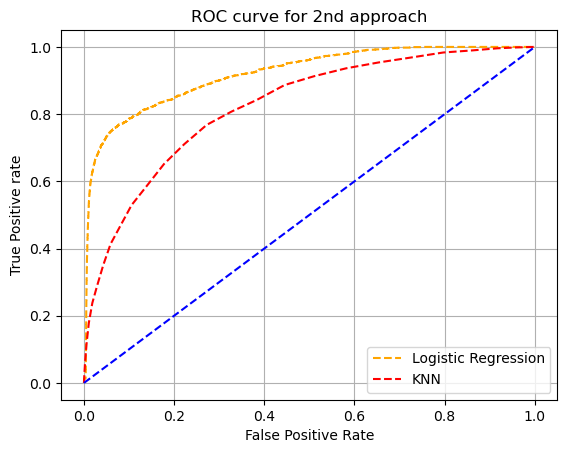

In [132]:
# fit model
lr.fit(X_train_res, y_train_res)
KNN.fit(X_train_res, y_train_res)



# predict probabilities
pred_prob3 = lr.predict_proba(X_test)
pred_prob4 = KNN.predict_proba(X_test)



from sklearn.metrics import roc_curve# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)# roc curve for tpr = fpr
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)# roc curve for tpr = fpr


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('default')# plot roc curves
plt.grid(None)
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve for 2nd approach')
# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


<font color=blue>**Interpretation**:</font>\
It depicts that Logistic Regression is doing better in respect to KNN model

## LOGISTIC REGRESSION MODELLING WITH NORMALIZED DATASET

In [133]:
#after dropping "displacemnt", "city_pop" and "recency", we will left with
fraud_data1.drop(["displacement","city_pop", "recency"],axis = 1,inplace=True)

# Now lets split the data into categorical dataset and numerical dataset
categorical_fdata = fraud_data1.select_dtypes(exclude=['int64','float64','datetime'])

# Removing "state" column from categorical_data dataset. 
categorical_fdataa = categorical_fdata.drop(columns=["state"])

# we will use one hot encoding to create dummy variables for column "category" and "trans_dayofweek" and 
#"recency_segment" and will encode "F" as 0 and "M" as 1 in "gender" column.

dummies=pd.get_dummies(categorical_fdataa[['category','trans_dayofweek', 'recency_segment']])
categorical_fdataa=pd.concat([categorical_fdataa,dummies],axis=1)

# we will use one hot encoding to create dummy variables for column "category", "trans_dayofweek", "state" and 
#"recency_segment" and will encode "F" as 0 and "M" as 1 in "gender" column.

dummies=pd.get_dummies(categorical_fdata[['category','trans_dayofweek', 'recency_segment','state']])
categorical_fdata=pd.concat([categorical_fdata,dummies],axis=1)


#Change category F to 0 and M to 1 in gender column and create dummy variable for state names
categorical_fdata['gender'].replace(('M','F'),('1','0'),inplace=True)
categorical_fdataa['gender'].replace(('M','F'),('1','0'),inplace=True)



# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

categorical_fdata['location']= label_encoder.fit_transform(categorical_fdata['location']) 
categorical_fdata['city_pop_segment']= label_encoder.fit_transform(categorical_fdata['city_pop_segment'])

categorical_fdataa['location']= label_encoder.fit_transform(categorical_fdataa['location']) 
categorical_fdataa['city_pop_segment']= label_encoder.fit_transform(categorical_fdataa['city_pop_segment'])

# now drop column "category", "trans_dayofweek", "recency_segment", "state"
categorical_fdata.drop(columns= ["category", "trans_dayofweek", "recency_segment","state"],axis=1, inplace=True)

# now drop column "category", "trans_dayofweek", "recency_segment"
categorical_fdataa.drop(columns= ["category", "trans_dayofweek", "recency_segment"],axis=1, inplace=True)


In [134]:
# Lets create a numerical dataset out of data3 dataset
numerical_fdata = fraud_data1.select_dtypes(exclude=['object'])

# separate target_variable "is_fraud"
target_varr = numerical_fdata.is_fraud

numerical_fdata.drop(columns = ["is_fraud"], inplace = True)

# standardize the numerical variables and not the label encoded variables.
# Use StandardScaler for Min-max normalization
from sklearn.preprocessing import MinMaxScaler
col= numerical_fdata.columns

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(numerical_fdata)
numerical_fdata_scaled = pd.DataFrame(np_scaled, columns=col)
numerical_fdata_scaled

amt  trans_hour  trans_month       age
0        0.114152         0.0          0.0  0.204819
1        0.416601         0.0          0.0  0.325301
2        0.491172         0.0          0.0  0.518072
3        0.327290         0.0          0.0  0.457831
4        0.320153         0.0          0.0  0.228916
...           ...         ...          ...       ...
1852389  0.324461         1.0          1.0  0.493976
1852390  0.420955         1.0          1.0  0.096386
1852391  0.394860         1.0          1.0  0.313253
1852392  0.156883         1.0          1.0  0.506024
1852393  0.310406         1.0          1.0  0.168675

[1852394 rows x 4 columns]

In [135]:
# Let's combine the categorical_data and numerical_data_scaled and target_var together.
data_norm = pd.concat([categorical_fdata, numerical_fdata_scaled, target_varr], axis=1)
# Let's combine the categorical_dataa and numerical_data_scaled and target_var together.
data_norm1 = pd.concat([categorical_fdataa, numerical_fdata_scaled, target_varr], axis=1)
#Defining X and y

X_n = data_norm.drop(columns="is_fraud") #independent columns
y_n = data_norm["is_fraud"]   #target column i.e is_fraud 



#Defining X and y

X1_n = data_norm1.drop(columns="is_fraud") #independent columns
y1_n = data_norm1["is_fraud"]   #target column i.e is_fraud 


# first balance the data and then split and then do modelling
under_sampler = RandomUnderSampler(random_state=42)
X_n_s, y_n_s = under_sampler.fit_resample(X_n, y_n)

# first balance the data and then split and then do modelling
under_sampler = RandomUnderSampler(random_state=42)
X1_n_s, y1_n_s = under_sampler.fit_resample(X1_n, y1_n)



#Now split the dataset into train and test dataset
X_n_s_train,X_n_s_test,y_n_s_train,y_n_s_test = train_test_split(X_n_s,y_n_s,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X_n_s_train.shape, X_n_s_test.shape, y_n_s_train.shape, y_n_s_test.shape)



#Now split the dataset into train and test dataset
X1_n_s_train,X1_n_s_test,y1_n_s_train,y1_n_s_test = train_test_split(X1_n_s,y1_n_s,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X1_n_s_train.shape, X1_n_s_test.shape, y1_n_s_train.shape, y1_n_s_test.shape)



(15441, 85)

(3861, 85)

(15441,)

(3861,)

(15441, 34)

(3861, 34)

(15441,)

(3861,)

In [136]:

#Lets create model LOGISTIC REGRESSION MODEL
lr = LogisticRegression(fit_intercept = False, C = 1e7)
lr.fit(X_n_s_train,y_n_s_train)




#Predict the test dataset
y_n_pred=lr.predict(X_n_s_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_n_s_test, y_n_s_test)))



# accuracy: (tp + tn) / (p + n)
accuracy_n = accuracy_score(y_n_s_test, y_n_pred)
print('Accuracy: %f' % accuracy_n)
# precision tp / (tp + fp)
precision_n = precision_score(y_n_s_test, y_n_pred)
print('Precision: %f' % precision_n)
# recall: tp / (tp + fn)
recall_n = recall_score(y_n_s_test, y_n_pred)
print('Recall: %f' % recall_n)
# f1: 2 tp / (2 tp + fp + fn)
f1_n = f1_score(y_n_s_test, y_n_pred)
print('F1 score: %f' % f1_n)
# ROC AUC
auc_n = roc_auc_score(y_n_s_test, y_n_pred)
print('ROC AUC: %f' % auc_n)

Accuracy of logistic regression classifier on test set: 0.79
Accuracy: 0.792023
Precision: 0.797613
Recall: 0.788205
F1 score: 0.792881
ROC AUC: 0.792062


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<font color=blue>**Interpretation**:</font>\
After Normalization, the accuracy has decreased for Logistic Regression.

## KNN MODELLING WITH NORMALIZED DATASET

In [137]:
# Fitting classifier to the Training set with "state" column in it
KNN = KNeighborsClassifier(n_neighbors = 3) #considering K = 3
model_fit=KNN.fit(X_n_s_train, y_n_s_train) 

# Predicting the Test set results
y_npred = KNN.predict(X_n_s_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_n_s_test, y_npred)
cm

array([[1389,  522],
       [ 394, 1556]], dtype=int64)

<Axes: xlabel='Predicted', ylabel='Actual'>

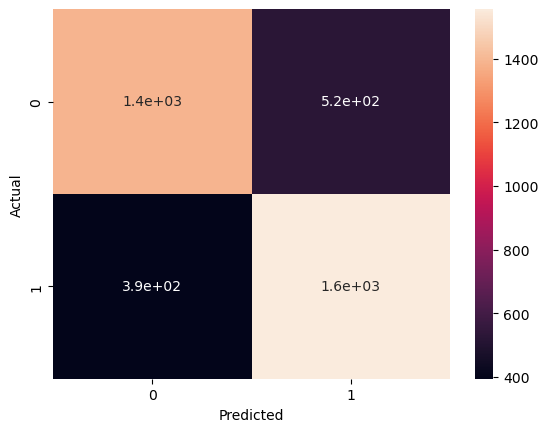

In [138]:
#Confusion Matrix
cnf_matrix = pd.crosstab(y_n_s_test, y_npred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

In [145]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_s_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_s_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_s_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_s_test, y_pred)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_s_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.753432
Precision: 0.736269
Recall: 0.797436
F1 score: 0.765633
ROC AUC: 0.752983


<font color=blue>**Interpretation**:</font>\
After Normalization, the accuracy has increased for the KNN Model.

## 7. FEATURE SELECTION

### 7.1. Correlation Heat Map

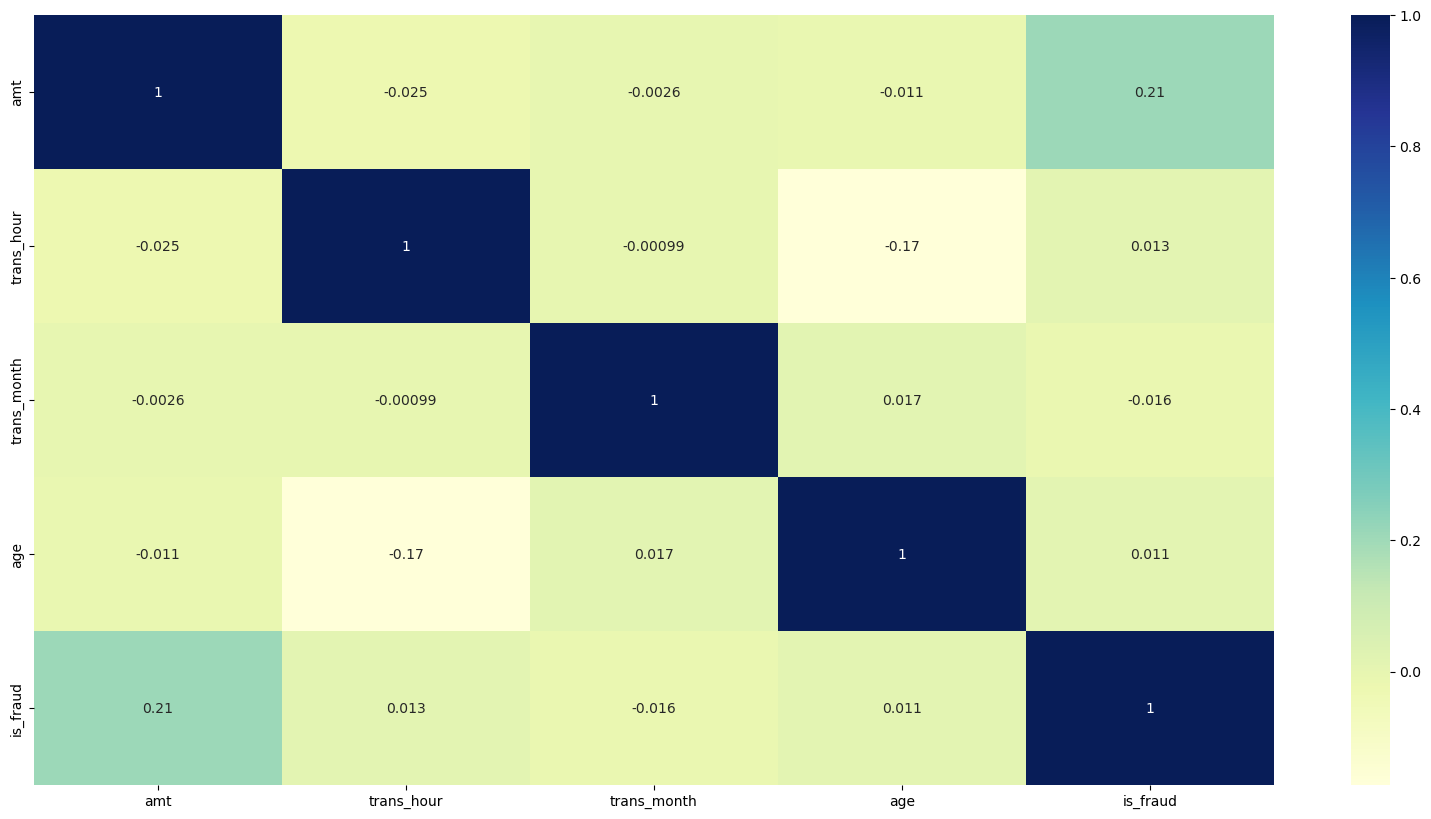

In [146]:
corrmat = pd.concat([numerical_data,target_var],axis=1).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(data3[top_corr_features].corr(),annot=True,cmap="YlGnBu")

### 7.2. Pearson Correlation

In [147]:
def cor_selector(X, y, num_features):
    X = X.apply(pd.to_numeric, errors='coerce')
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

# Applying the function
cor_support, cor_feature = cor_selector(X, y, 20)

# Print results
print(str(len(cor_feature)), 'selected features')
print(cor_feature)


20 selected features
['category_misc_pos', 'age', 'category_personal_care', 'category_entertainment', 'recency_segment_After 24 hours', 'trans_hour', 'category_health_fitness', 'category_food_dining', 'category_kids_pets', 'trans_month', 'category_home', 'recency_segment_After 6 hours', 'recency_segment_Within 6 hours', 'category_misc_net', 'recency_segment_First Transaction', 'state_DE', 'category_grocery_pos', 'category_shopping_net', 'recency_segment_Recent_Transaction', 'amt']


### 7.3. Chi-Squared Method

In [148]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns
featureScores
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                            Attributes        Score
28  recency_segment_Recent_Transaction  3883.815844
14               category_shopping_net  3087.488722
7                 category_grocery_pos  1879.388481
38                            state_DE  1718.442338
27   recency_segment_First Transaction  1421.641496
11                   category_misc_net  1071.967623
81                                 amt  1029.481727
29      recency_segment_Within 6 hours   496.735761
9                        category_home   463.383482
25       recency_segment_After 6 hours   459.665491
10                  category_kids_pets   346.082703
4                 category_food_dining   334.544654
8              category_health_fitness   323.791840
24      recency_segment_After 24 hours   286.181026
3               category_entertainment   238.019272
13              category_personal_care   222.994581
12                   category_misc_pos   126.010650
18              trans_dayofweek_Monday   101.424974
83          

<font color=blue>**Interpretation**:</font>\
After doing feature selection by above methods, we decided to go with 22 variables.


Selected features are:\
**'category_misc_pos', 'age', 'category_personal_care', 'category_entertainment', 'recency_segment_After 24 hours', 'trans_hour', 'category_health_fitness', 'category_food_dining', 'category_kids_pets', 'trans_month', 'category_home', 'recency_segment_After 6 hours', 'recency_segment_Within 6 hours', 'category_misc_net', 'recency_segment_First Transaction', 'state_DE', 'category_grocery_pos', 'category_shopping_net', 'recency_segment_Recent_Transaction', 'amt', 'trans_dayofweek_Monday', 'category_grocery_net'.**

## 8. Modelling after Feature selection

In [149]:
data3=data3[['category_misc_pos', 'age', 'category_personal_care', 'category_entertainment', 
             'recency_segment_After 24 hours', 'trans_hour', 'category_health_fitness', 'category_food_dining', 
             'category_kids_pets', 'trans_month', 'category_home', 'recency_segment_After 6 hours', 
             'recency_segment_Within 6 hours', 'category_misc_net', 'recency_segment_First Transaction', 
             'state_DE', 'category_grocery_pos', 'category_shopping_net', 'recency_segment_Recent_Transaction', 
             'amt', 'trans_dayofweek_Monday', 'category_grocery_net','is_fraud']]

In [150]:
data3.columns

Index(['category_misc_pos', 'age', 'category_personal_care',
       'category_entertainment', 'recency_segment_After 24 hours',
       'trans_hour', 'category_health_fitness', 'category_food_dining',
       'category_kids_pets', 'trans_month', 'category_home',
       'recency_segment_After 6 hours', 'recency_segment_Within 6 hours',
       'category_misc_net', 'recency_segment_First Transaction', 'state_DE',
       'category_grocery_pos', 'category_shopping_net',
       'recency_segment_Recent_Transaction', 'amt', 'trans_dayofweek_Monday',
       'category_grocery_net', 'is_fraud'],
      dtype='object')

### Splitting X and y to prepare for the modelling phase after Feature Selection

In [151]:
#Defining X and y

X = data3.drop(columns="is_fraud") #independent columns
y = data3["is_fraud"]   #target column i.e is_fraud 


#### Balancing the data after Feature Selection

In [152]:
# first balance the data and then split and then do modelling
under_sampler = RandomUnderSampler(random_state=42)
X_s, y_s = under_sampler.fit_resample(X, y)

In [153]:
y_s.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

### Split the dataset into train and test dataset

In [154]:
#Now split the dataset into train and test dataset
X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s,y_s,test_size=0.20,random_state=40) #80% Train and 20% Test
display(X_s_train.shape, X_s_test.shape, y_s_train.shape, y_s_test.shape)

(15441, 22)

(3861, 22)

(15441,)

(3861,)

## 8.1 Logistic Regression after Feature Selection

In [155]:
#Lets create model LOGISTIC REGRESSION MODEL
lr = LogisticRegression(fit_intercept = False, C = 1e7)
lr.fit(X_s_train,y_s_train)

LogisticRegression(C=10000000.0, fit_intercept=False)

In [156]:
#Predict the test dataset
y_pred=lr.predict(X_s_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_s_test, y_s_test)))

Accuracy of logistic regression classifier on test set: 0.83


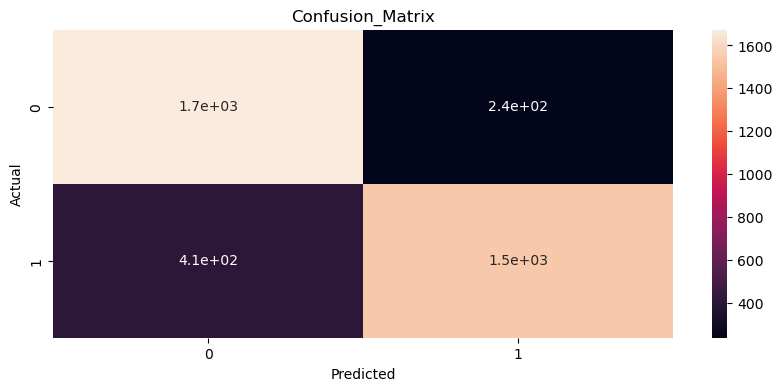

In [157]:
# Assuming you have actual labels (y_s_test) and predicted labels (y_pred)
cnf_matrix = pd.crosstab(y_s_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,4))


# Use seaborn's heatmap to visualize the confusion matrix
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion_Matrix')
plt.show()

In [158]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_s_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_s_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_s_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_s_test, y_pred)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_s_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.832427
Precision: 0.866217
Recall: 0.790256
F1 score: 0.826495
ROC AUC: 0.832857


### Comparison of Logistic Regression Model before and after Feature Selection

LR Model before Feature Selection\
Accuracy: 0.844859\
Precision: 0.867319\
Recall: 0.817949\
F1 score: 0.841911\
ROC AUC: 0.845133\
\
LR Model after Feature Selection\
Accuracy: 0.832427\
Precision: 0.866217\
Recall: 0.790256\
F1 score: 0.826495\
ROC AUC: 0.832857\


<font color=blue>**Interpretation**:</font>
The accuracy of the model declined slightly after feature selection

## 8.2. KNN after Feature Selection

In [159]:
# Fitting classifier to the Training set with "state" column in it
KNN = KNeighborsClassifier(n_neighbors = 7) #considering K = 7
model_fit=KNN.fit(X_s_train, y_s_train) 

# Predicting the Test set results
y_pred = KNN.predict(X_s_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_s_test, y_pred)
cm

array([[1528,  383],
       [ 332, 1618]], dtype=int64)

<Axes: xlabel='Predicted', ylabel='Actual'>

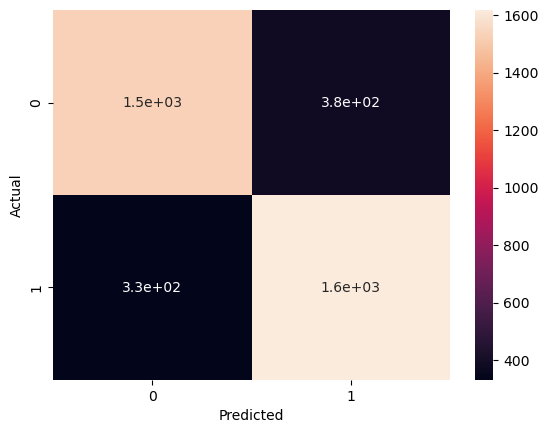

In [160]:
#Confusion Matrix
cnf_matrix = pd.crosstab(y_s_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

In [161]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_s_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_s_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_s_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_s_test, y_pred)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_s_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.814815
Precision: 0.808596
Recall: 0.829744
F1 score: 0.819033
ROC AUC: 0.814662


In [162]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_s_train, y_s_train)
    y_preds = classifier.predict(X_s_test)
    print("Accuracy for k =", k, "is:", accuracy_score(y_s_test, y_preds)) 

Accuracy for k = 1 is: 0.7972027972027972
Accuracy for k = 2 is: 0.797979797979798
Accuracy for k = 3 is: 0.806008806008806
Accuracy for k = 4 is: 0.8080808080808081
Accuracy for k = 5 is: 0.8111888111888111
Accuracy for k = 6 is: 0.8083398083398083
Accuracy for k = 7 is: 0.8148148148148148
Accuracy for k = 8 is: 0.8114478114478114
Accuracy for k = 9 is: 0.8142968142968143
Accuracy for k = 10 is: 0.8093758093758093
Accuracy for k = 11 is: 0.8093758093758093
Accuracy for k = 12 is: 0.8078218078218078
Accuracy for k = 13 is: 0.8083398083398083
Accuracy for k = 14 is: 0.8093758093758093
Accuracy for k = 15 is: 0.811965811965812
Accuracy for k = 16 is: 0.8122248122248122
Accuracy for k = 17 is: 0.8096348096348096
Accuracy for k = 18 is: 0.8122248122248122
Accuracy for k = 19 is: 0.810929810929811
Accuracy for k = 20 is: 0.810929810929811
Accuracy for k = 21 is: 0.8078218078218078
Accuracy for k = 22 is: 0.8078218078218078
Accuracy for k = 23 is: 0.8057498057498057
Accuracy for k = 24 is: 0

### Comparison of KNN Model before and after Feature Selection
KNN Model before Feature Selction\
Accuracy: 0.753432\
Precision: 0.736269\
Recall: 0.797436\
F1 score: 0.765633\
ROC AUC: 0.752983\
\
KNN Model after Feature Selection\
Accuracy: 0.814815\
Precision: 0.808596\
Recall: 0.829744\
F1 score: 0.819033\
ROC AUC: 0.814662\


<font color=blue>**Interpretation**:</font>

The accuracy of the model improved significantly after feature selection.

## ROC Curve for both the Models after Feature Selection

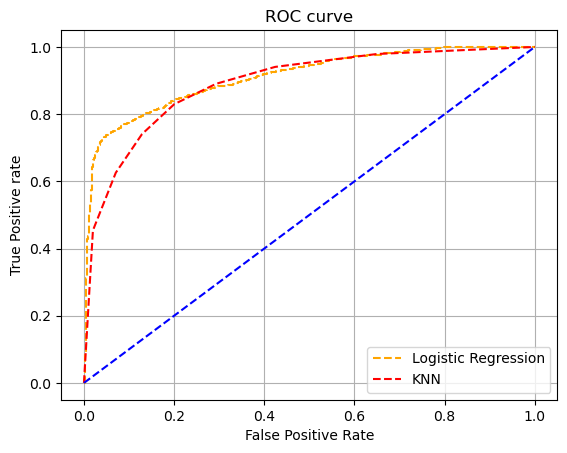

In [163]:
#ROC curve for both the Model
# fit model
lr.fit(X_s_train, y_s_train)
KNN.fit(X_s_train, y_s_train)



# predict probabilities
pred_prob1 = lr.predict_proba(X_s_test)
pred_prob2 = KNN.predict_proba(X_s_test)



from sklearn.metrics import roc_curve# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_s_test, pred_prob1[:,1], pos_label=1)# roc curve for tpr = fpr
fpr2, tpr2, thresh2 = roc_curve(y_s_test, pred_prob2[:,1], pos_label=1)# roc curve for tpr = fpr


random_probs = [0 for i in range(len(y_s_test))]
p_fpr, p_tpr, _ = roc_curve(y_s_test, random_probs, pos_label=1)

plt.style.use('default')# plot roc curves
plt.grid(None)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Predicting the class of new records

### Using Logistic regression Model

In [164]:
#Create New random inputs for selected variables
new_input = {
    'category_misc_pos':[0], 
    'age':[0.45],
    'category_personal_care':[0],
    'category_entertainment':[0],
    'recency_segment_After 24 hours':[0],
    'trans_hour':[0.95],
    'category_health_fitness':[0],
    'category_food_dining':[0],
    'category_kids_pets':[0], 
    'trans_month':[1],
    'category_home':[0],
    'recency_segment_After 6 hours':[1],
    'recency_segment_Within 6 hours':[0],
    'category_misc_net':[0],
    'recency_segment_First Transaction':[0],
    'state_DE':[1],
    'category_grocery_pos':[0],
    'category_shopping_net':[1],
    'recency_segment_Recent_Transaction':[0], 
    'amt':[0.003452], 
    'trans_dayofweek_Monday':[1],
    'category_grocery_net':[0]}

new_input_df = pd.DataFrame(new_input)
#print(new_input_df)

In [165]:
# Prediction by Logistic Regression Model
new_data_predict=lr.predict(new_input_df)
new_data_predict

array([1], dtype=int64)

In [166]:
# Prediction by KNN Model
new_data_predict1 = classifier.predict(new_input_df)
new_data_predict1

array([1], dtype=int64)

## Conclusion

- We trained our data using logistic regression and KNN.
- The model was trained in 2 ways:
    1. By balancing the data and then splitting into test and train.
    2. By splitting the data and then balancing onky training data.
- The data was split into 2:
    1. A dataset which had label encoded "state" as an input variable
    2. A dataset which did not include "state" as an input variable
    The dataset without "state" always had higher accuracy
- Prior to feature selection Logistic regression model had a higher accuracy in predicting fraud transactions.
- After feature selection 22 variables were selected and the data was trained again on logistic regression and KNN models.
- The accuracy of KNN models increased after feature selection.
- But we'll conside Logistic Regression as our final Model, since in ROC curve Logistic regression has higher sensitivity for lower number of False positives.